# World University Rankings




**About Dataset**

World University Rankings: https://www.kaggle.com/mylesoneill/world-university-rankings

This dataset contains **three** **global university rankings** from very different places.

- **THE**(The Times Higher Education World University Ranking): One of the most influential and widely observed university measures. Founded in the United Kingdom in 2010.

- **ARWU** (The Academic Ranking of World Universities): Also known as the Shanghai Ranking, is an equally influential ranking to THE, founded in China in 2003 and has been criticized for focusing on *raw research power* and for undermining humanities and quality of instruction.

- **CWUR** (The Center for World University Rankings): Comes from Saudi Arabia and founded in 2012.




---
By exploring this dataset, we would like to find these answers:

1. Top Countries by Number of Top Universities

2. Which universities appear in two systems but not the third, and what causes these mismatches?

3. How does our alma mater fare against the world?

4. How does the global distribution of top universities change when comparing the Top 100 and the Top 500?
---







In [ ]:
!pip install missingno

# Step 1: Dataset choice
We choose **World University Rankings: https://www.kaggle.com/mylesoneill/world-university-rankings**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Step 2: Load Data, Explore data, Perform data preparation and cleaning**

# 2.1 Load **CSV files**

We load three csv files into our environment.


In [ ]:
# Load three rangking into seperate DataFrames
the_org_df = pd.read_csv('/content/drive/MyDrive/university/timesData.csv')
arwu_org_df = pd.read_csv('/content/drive/MyDrive/university/shanghaiData.csv')
cwur_org_df  = pd.read_csv('/content/drive/MyDrive/university/cwurData.csv') # pd.read_csv('cwurData.csv')

# the_org_df = pd.read_csv('timesData.csv')
# arwu_org_df = pd.read_csv('shanghaiData.csv')
# cwur_org_df = pd.read_csv('cwurData.csv')

# **2.2 Explore Data**

###**2.2.1 Explore THE Data**

In [ ]:
the_org_df.tail(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2593,601-800,University of West Bohemia,Czech Republic,16.3,23.1,9.7,29.8,32.1,-,"15,639",21.5,2%,52 : 48,2016
2594,601-800,University of the West of England,United Kingdom,16.9,48.5,11.2,34.6,28.5,-,"22,525",21.4,15%,53 : 47,2016
2595,601-800,West University of Timişoara,Romania,16.1,21.0,3.9,22.4,-,-,"12,933",19.0,3%,62 : 38,2016
2596,601-800,University of Westminster,United Kingdom,17.3,81.9,11.7,21.1,28.5,-,"16,609",21.0,43%,57 : 43,2016
2597,601-800,Xidian University,China,17.9,12.8,12.1,8.9,83.7,-,"31,618",16.4,2%,29 : 71,2016
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,"8,663",20.6,4%,43 : 57,2016


In [ ]:
print(f'The THE dataset shape is {the_org_df.shape}')
print(the_org_df.dtypes)
the_org_df.info()
the_org_df.head()

The THE dataset shape is (2603, 14)
world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   obje

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


### **2.2.2 Explore ARWU Data**

In [ ]:
print(f'THE ARWU dataset shape is {arwu_org_df.shape}')
print(arwu_org_df.dtypes)
arwu_org_df.info()
arwu_org_df.head()

THE ARWU dataset shape is (4897, 11)
world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   f

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


### 2.2.3 **Explore CWUR Data**

In [ ]:
print(f'THE CWUR dataset shape is {cwur_org_df.shape}')
print(cwur_org_df.dtypes)
cwur_org_df.info()
cwur_org_df.head()

THE CWUR dataset shape is (2200, 14)
world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-n

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


**Each dataset was loaded using Pandas.
Basic inspection revealed the number of rows, columns, and data types of each file.**

| Ranking | Columns | Row Counts |
|----------|----------|----------|
| THE  | 14 | 2603  |
| ARWU  | 11 | 4897  |
| CWUR  | 14  | 2200  |

###  **THE**(The Times Higher Education World University Ranking) contains 14 **Columns**:
- **world_rank**: world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250)
- **university_name**: name of university
- **country**: country of each university
- **teaching**: university score for teaching (the learning environment)
- **international**: university score international outlook (staff, students, research)
- **research**: university score for research (volume, income and reputation)
- **citations**: university score for citations (research influence)
- **income**: university score for industry income (knowledge transfer)
- **total_score**: total score for university, used to determine rank
- **num_students**: number of students at the university

### **ARWU**(The Academic Ranking of World Universities) contains 11 **Columns**:
1. **world_rank**: world rank for the university. Contains rank ranges and equal ranks (eg. 101-152), whereas **THE** contains rank ranges and equal ranks (eg. =94 and 201-250)
2. **university_name**: name of university
3. **national_rank**: rank of university within its country
4. **total_score**: total score, used to determine rank

5. **alumni**:Alumni Score, based on the number of alumni of an institution winning nobel prizes and fields medals
6. **award**: Award Score, based on the number of staff of an institution winning Nobel Prizes in Physics, Chemistry, Medicine, and Economics and Fields Medals in Mathematics, similar to **research** in **THE** ranking
7. **hici**: HiCi Score, based on the number of **Highly Cited Researchers** selected by Thomson Reuters, similar to **citations**(university score for citations (research influence)) in **THE** ranking, but counting the research ers' numbers
8. **ns**: Nature and Science Score, based on the number of papers published in Nature and Science
9. **pub**: PUB Score, based on total number of papers indexed in the Science Citation Index-Expanded and Social Science Citation Index

10. **pcp**: Per Capita Performance Score, the weighted scores of the above five indicators divided by the number of full time academic staff
11. **year**: the year


### **CWUR** (The Center for World University Rankings): Comes from Saudi Arabia and founded in 2012. contains 14 Columns:

1. **world_rank**: world rank for university
2. **institution**: name of university
3. **country**: country of each university
4. **national_rank**: rank of university within its country

5. **quality_of_education**: rank for quality of education （25%）
6. **alumni_employment**: rank for alumni employment   （10%）
7. **quality_of_faculty**: rank for quality of faculty   （10%）
8. **publications**: High-Quality Publications   （10%）
9. **influence**: rank for influence   （10%）
10. **citations**:    （10%）

11. **patents**:
12. **broad_impact**:

13. **score**:
14. **year**: the year



Compared to **THE** ranking, in **ARWU**, the following metrics is missing:
1. **country**: country of each university
2. **international**: university score international outlook (staff, students, research)
3. **num_students**: number of students at the university
4. **income**: university score for industry income (knowledge transfer)
5. **research**: university score for research (volume, income and reputation)




THE Ranking: Map Missing values per column:
world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64


/tmp/ipython-input-2371924184.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2371924184.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


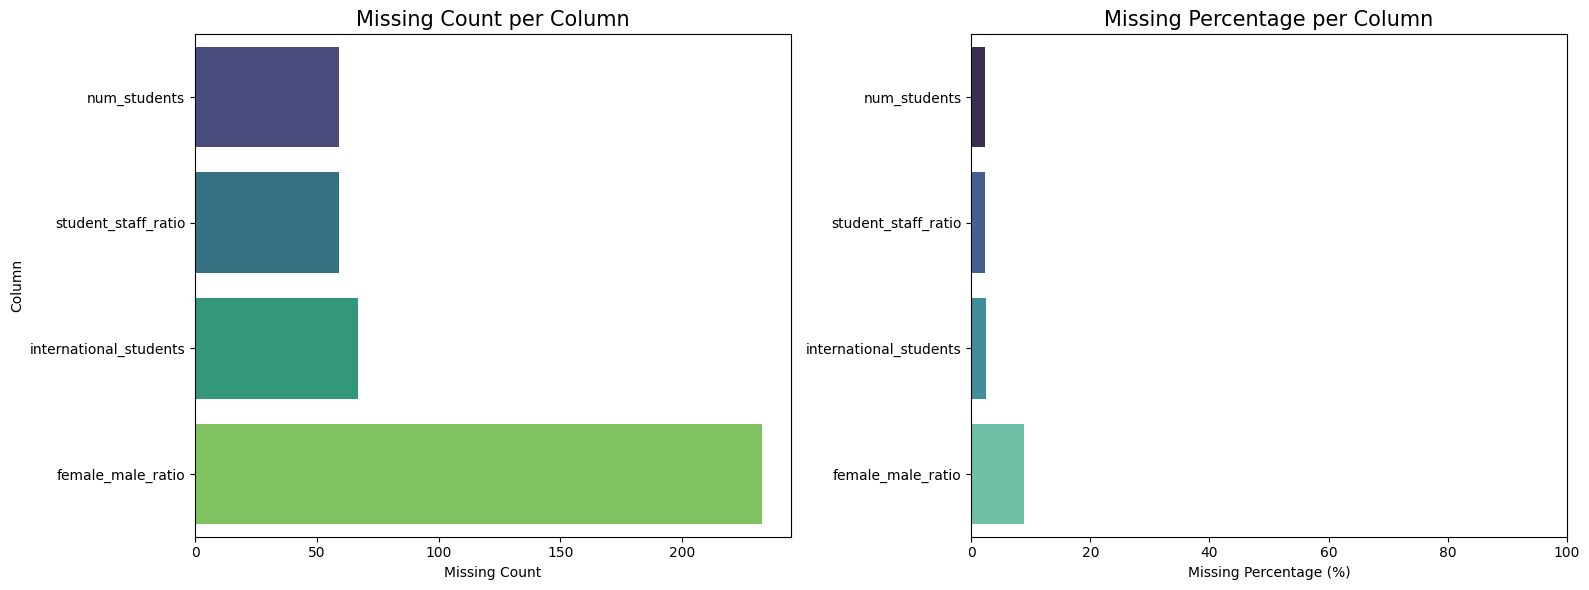

In [ ]:
print("THE Ranking: Map Missing values per column:")
print(the_org_df.isna().sum())

# Calculate missing counts per column
missing_counts = the_org_df.isna().sum()
# Calculate missing percentages per column
missing_percent = the_org_df.isna().mean() * 100

# Keep only columns with missing values
missing_counts = missing_counts[missing_counts > 0]
missing_percent = missing_percent[missing_percent > 0]

# Create a 1x2 figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Left plot: Missing Count ---
sns.barplot(
    x=missing_counts.values,
    y=missing_counts.index,
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Missing Count per Column", fontsize=15)
axes[0].set_xlabel("Missing Count")
axes[0].set_ylabel("Column")

# --- Right plot: Missing Percentage ---
sns.barplot(
    x=missing_percent.values,
    y=missing_percent.index,
    palette="mako",
    ax=axes[1]
)
axes[1].set_title("Missing Percentage per Column", fontsize=15)
axes[1].set_xlabel("Missing Percentage (%)")
axes[1].set_ylabel("")  # Remove duplicate label for cleaner look
axes[1].set_xlim(0, 100)

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

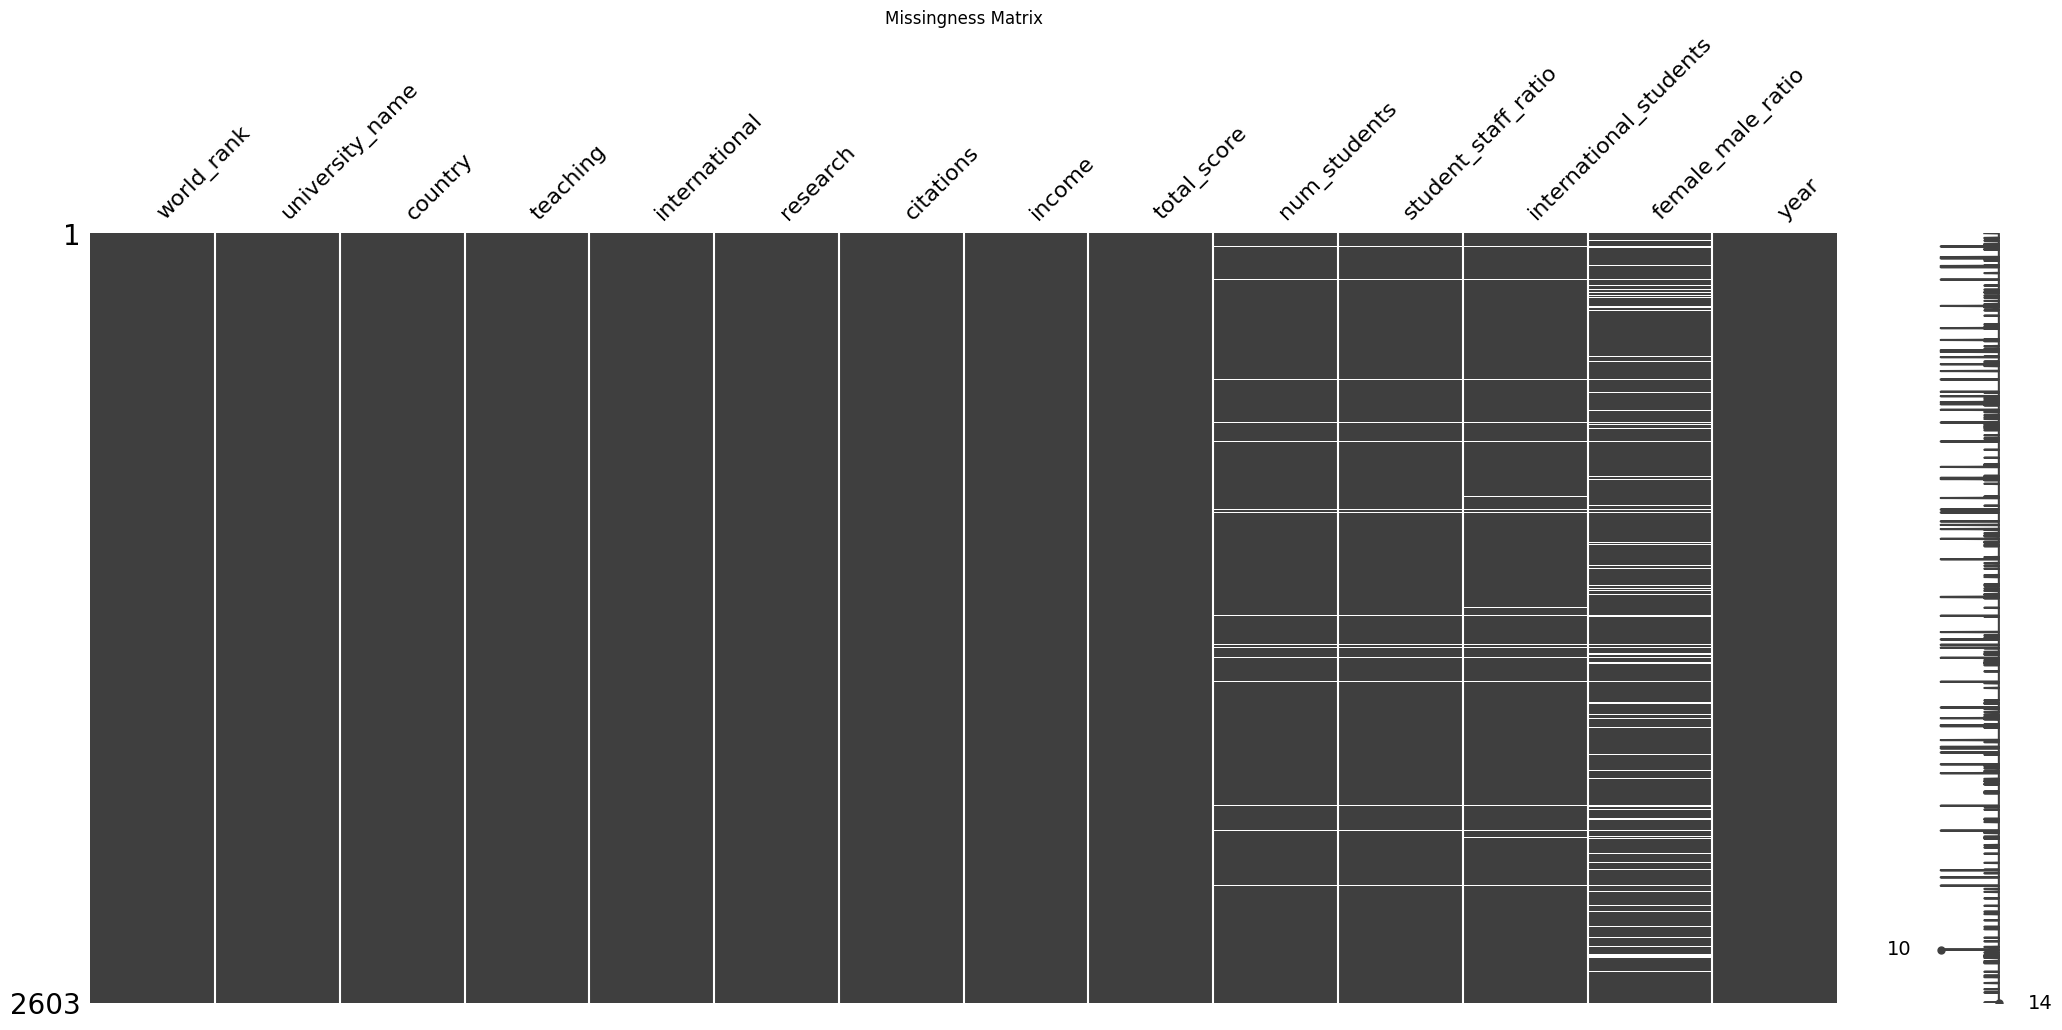

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Display the missingness matrix
plt.figure(figsize=(12, 6))
msno.matrix(the_org_df)
plt.title("Missingness Matrix")
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame ranking missing values
missing_table = pd.DataFrame({
    "Missing_Count": the_org_df.isna().sum(),
    "Missing_Percent": the_org_df.isna().mean() * 100
})

# Keep only columns with missing values
missing_table = missing_table[missing_table["Missing_Count"] > 0]

# Sort by Missing_Percent (highest first)
missing_table = missing_table.sort_values(by="Missing_Percent", ascending=False)

print("Missing Value Ranking Table:")
print(missing_table)


Missing Value Ranking Table:
                        Missing_Count  Missing_Percent
female_male_ratio                 233         8.951210
international_students             67         2.573953
student_staff_ratio                59         2.266615
num_students                       59         2.266615


In [ ]:
df_clean = the_org_df.copy()

for col in df_clean.columns:
    if df_clean[col].isna().sum() > 0:

        # If column is numeric → fill with median
        if np.issubdtype(df_clean[col].dtype, np.number):
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

        # Otherwise treat missing as category
        else:
            df_clean[col] = df_clean[col].fillna("Missing")

print("Missing values after automatic treatment:")
print(df_clean.isna().sum())

# copy back to the_df
the_df = df_clean.copy()

Missing values after automatic treatment:
world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64


<Figure size 800x600 with 0 Axes>

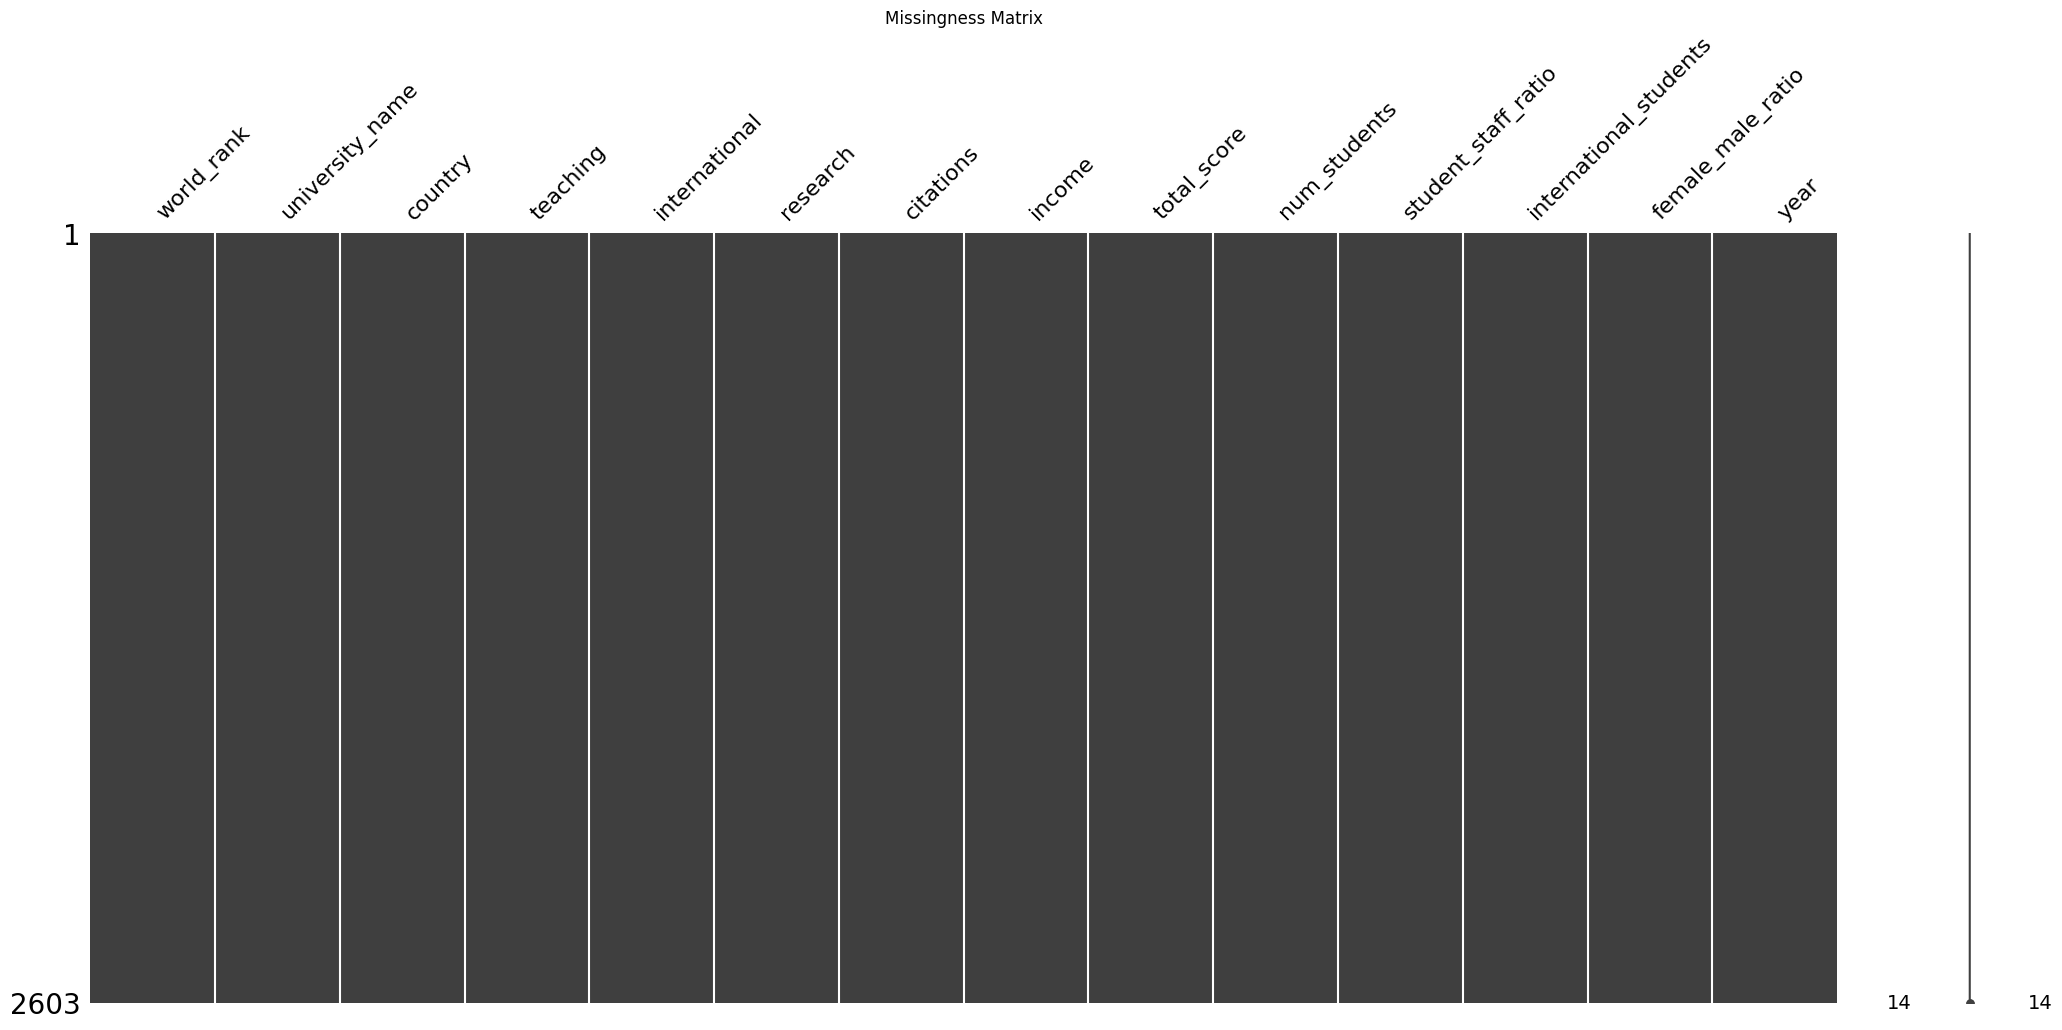

In [ ]:
# Display the missingness matrix
plt.figure(figsize=(8, 6))
msno.matrix(the_df)
plt.title("Missingness Matrix")
plt.show()


# **2.3: Perform data preparation and cleaning**

In [ ]:
# copy original rankings
the_df = the_org_df.copy()
arwu_df = arwu_org_df.copy()
cwur_df = cwur_org_df.copy()

#Remove duplicates
the_df.drop_duplicates(inplace=True)
arwu_df.drop_duplicates(inplace=True)
arwu_df.drop_duplicates(inplace=True)

### **2.3.1 Standardize column names**

| Ranking | institution | Score |
|----------|----------|----------|
| THE  | university_name | total_score  |
| ARWU  | university_name | total_score  |
| CWUR  | institution  | score  |

In [ ]:

the_df.rename(columns={"university_name": "institution", "total_score": "score"}, inplace=True)
arwu_df.rename(columns={"university_name": "institution", "total_score": "score"}, inplace=True)

###**2.3.2 Fix Data Types**

The datasets contained several fields stored as strings (“object” types)
that needed to be converted into numerical formats for analysis. The
world_rank column in THE and ARWU required complex parsing due to mixed
formats such as ranges (e.g., “201–225”), tie indicators (“=82”), and
floating strings (“12.0”). A custom function was implemented to extract
a consistent integer rank for all rows.

- Additional fields in THE such as income, score, num_students, and
international_students were converted to numeric values after removing
commas, percentage signs, and other non-numeric characters.  
The female_male_ratio column was parsed from values like “45:55” into a
numeric ratio.


- ARWU’s national_rank column was also normalized into integer format.

- CWUR did not require type correction, as its numerical fields were already
properly formatted.


In [ ]:
print('----THE----------------------------')
print(the_df.dtypes)
print('----ARWU----------------------------')
print(arwu_df.dtypes)
print('----CWUR----------------------------')
print(cwur_df.dtypes)

----THE----------------------------
world_rank                 object
institution                object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
score                      object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object
----ARWU----------------------------
world_rank        object
institution       object
national_rank     object
score            float64
alumni           float64
award            float64
hici             float64
ns               float64
pub              float64
pcp              float64
year               int64
dtype: object
----CWUR----------------------------
world_rank                int64
institution              object
country                  object
national_rank  

In [ ]:
the_df["world_rank"].unique()


array(['1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '47', '48', '49', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64',
       '65', '66', '67', '68', '71', '72', '73', '75', '76', '77', '78',
       '79', '81', '83', '85', '86', '87', '88', '89', '90', '93', '94',
       '95', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '109', '111', '112', '114', '115', '117', '118', '119',
       '120', '122', '124', '127', '128', '129', '130', '132', '135',
       '136', '137', '138', '139', '140', '142', '143', '144', '145',
       '147', '149', '151', '152', '155', '156', '158', '159', '161',
       '163', '164', '165', '167', '168', '170', '171', '172', '173',
       '174', '177', '178', '181', '182', '183', '184', '185', '186

In [ ]:
the_df["score"].unique()


array(['96.1', '96.0', '95.6', '94.3', '94.2', '91.2', '91.1', '90.6',
       '89.5', '87.7', '86.9', '86.4', '83.9', '83.4', '82.0', '81.0',
       '79.5', '79.3', '79.2', '78.4', '78.0', '76.5', '75.9', '75.6',
       '75.3', '75.1', '75.0', '73.8', '73.2', '73.0', '72.9', '71.7',
       '71.0', '70.7', '69.9', '69.5', '69.2', '69.0', '68.6', '67.0',
       '66.9', '66.5', '66.0', '65.9', '65.6', '65.2', '65.0', '64.9',
       '64.7', '64.6', '64.2', '64.0', '63.9', '63.0', '62.8', '62.7',
       '62.2', '62.1', '61.6', '61.4', '61.2', '61.1', '60.7', '60.4',
       '60.3', '59.7', '59.6', '59.5', '59.1', '59.0', '58.9', '58.3',
       '58.0', '57.9', '57.8', '57.7', '57.6', '57.5', '57.3', '57.2',
       '57.1', '57.0', '56.9', '56.6', '56.5', '56.4', '56.3', '56.2',
       '56.1', '56.0', '55.6', '55.4', '55.3', '55.2', '55.1', '55.0',
       '54.8', '54.6', '54.5', '54.4', '54.3', '54.2', '54.0', '53.4',
       '53.3', '52.7', '52.6', '52.5', '52.4', '52.3', '52.2', '52.1',
      

In [ ]:
the_df["income"].unique()

array(['34.5', '83.7', '87.5', '64.3', '-', '57.0', '73.5', '92.9',
       '100.0', '34.7', '59.6', '43.7', '53.7', '56.5', '39.0', '32.8',
       '95.1', '89.8', '42.6', '50.2', '51.8', '40.5', '47.7', '98.6',
       '42.2', '64.1', '30.7', '73.3', '31.7', '29.2', '38.0', '30.3',
       '84.2', '48.0', '53.9', '67.1', '97.8', '29.6', '40.4', '37.9',
       '36.2', '90.8', '52.7', '31.6', '44.1', '29.1', '57.1', '39.1',
       '33.9', '38.4', '30.5', '33.2', '37.7', '43.8', '45.8', '26.1',
       '30.2', '32.6', '44.0', '43.0', '26.7', '32.4', '60.5', '99.8',
       '35.7', '32.7', '97.7', '43.4', '38.9', '95.5', '97.1', '28.8',
       '44.5', '61.0', '73.4', '27.4', '82.3', '79.8', '41.5', '42.5',
       '40.3', '81.4', '26.4', '49.3', '30.0', '55.3', '61.1', '34.8',
       '36.0', '39.5', '57.2', '47.0', '99.4', '31.1', '60.0', '40.0',
       '49.6', '50.1', '37.5', '38.8', '40.6', '61.5', '38.3', '34.2',
       '41.2', '41.6', '29.7', '27.8', '40.8', '29.4', '98.7', '56.6',
       '

## The '**world_rank**' column contained mixed formats, including ties (e.g., '=82'), ranges ('201-225'), floats ('12.0'), and plain integers. A custom parsing function was implemented to convert all formats into consistent numeric ranks by extracting the minimum value of each range or tie.

In [ ]:
import re

def get_min_rank(x):
    """
    Convert various rank formats to a minimum numeric rank.

    Examples:
    '54-71'   -> 54
    '=82'     -> 82
    '1.0'     -> 1
    '12'      -> 12
    NaN       -> pd.NA
    """

    if pd.isna(x):
        return pd.NA

    s = str(x).strip()

    # ------------ Case 1: ranges like '54-71'
    if "-" in s:
        left = s.split("-")[0].strip()
        try:
            return int(float(left))
        except:
            return pd.NA

    # ------------ Case 2: equals sign like '=82'
    if s.startswith("="):
        num = s[1:].strip()
        try:
            return int(float(num))
        except:
            return pd.NA

    # ------------ Case 3: floats like '12.0'
    if re.match(r"^\d+\.\d+$", s):
        return int(float(s))

    # ------------ Case 4: pure integer string
    if s.isdigit():
        return int(s)

    # ------------ Case 5: fallback: extract any leading number
    m = re.match(r"^(\d+)", s)
    if m:
        return int(m.group(1))

    return pd.NA


In [ ]:
the_df["world_rank_the"]=the_df["world_rank"].apply(get_min_rank).astype("Int64")
the_df['world_rank_the'].unique()

<IntegerArray>
[  1,   2,   3,   4,   5,   6,   8,   9,  10,  11,
 ...
 198, 351, 126, 160, 188, 175, 179, 401, 501, 601]
Length: 210, dtype: Int64

Similar to THE ranking, the ARWU column contained mixed formats, including ties (e.g.,
ranges ('201-225'), and plain integers. A custom parsing
function was implemented to convert all formats into consistent numeric ranks
by extracting the minimum value of each range or tie.


In [ ]:
arwu_df['national_rank_arwu'] =  arwu_df["national_rank"].apply(get_min_rank).astype("Int64")
arwu_df['world_rank_arwu'] =  arwu_df["world_rank"].apply(get_min_rank).astype("Int64")

arwu_df['world_rank_arwu'].unique()


<IntegerArray>
[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
 ...
 102, 151, 201,  49,  91, 305, 403, 152, 303, 402]
Length: 113, dtype: Int64

### **2.3.3 Handle missing, invalid, inconsistent values**

In [ ]:
print('----THE----------------------------')
print(the_df.isna().sum())
print('----ARWU----------------------------')
print(arwu_df.isna().sum())
print('----CWUR----------------------------')
print(cwur_df.isna().sum())

----THE----------------------------
world_rank                  0
institution                 0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
score                       0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
world_rank_the              0
dtype: int64
----ARWU----------------------------
world_rank               0
institution              1
national_rank            1
score                 3796
alumni                   1
award                    2
hici                     2
ns                      22
pub                      2
pcp                      2
year                     0
national_rank_arwu       1
world_rank_arwu          0
dtype: int64
----CWUR----------------------------
world_rank                0
institution               0
country


**THE:**
Missing values were identified primarily in **gender ratios** and **student counts**. Since these variables were not essential for ranking analysis, missing values were retained to avoid unnecessary data loss.

**ARWU:**
Missing values were identified primarily in **score**.

**CWUR:**
Missing values were identified primarily in **broad_impact**.

### THE Missing Data Function for calculation and plot

In [ ]:
def calc_plot_missing_data(df, dataset_name):
  missing_counts = df.isna().sum()
  # Calculate percentage of missing values per column
  missing_percent = df.isna().mean() * 100

  missing_counts = missing_counts[missing_counts > 0]
  # Keep only columns with missing values
  missing_percent = missing_percent[missing_percent > 0]


  # Create a 1x2 figure
  fig, axes = plt.subplots(1, 2, figsize=(10, 3))

  # --- Left plot: Missing Count ---
  sns.barplot(
      x=missing_counts.values,
      y=missing_counts.index,
       hue=missing_counts.index,
      palette="viridis",
      ax=axes[0]
  )
  axes[0].set_title(f"Missing Count per Column ({dataset_name})", fontsize=15)
  axes[0].set_xlabel("Missing Count")
  axes[0].set_ylabel("Column")

  # --- Right plot: Missing Percentage ---
  sns.barplot(
      x=missing_percent.values,
      y=missing_percent.index,
      hue=missing_percent.index,
      palette="mako",
      ax=axes[1]
  )
  axes[1].set_title(f"Missing Percentage per Column ({dataset_name})", fontsize=15)
  axes[1].set_xlabel("Missing Percentage (%)")
  axes[1].set_ylabel("")

  # 👉 Set x-axis range to 0–100%
  axes[1].set_xlim(0, 100)

  # Adjust layout
  plt.tight_layout()
  plt.show()


In [ ]:
def plot_missing_for_multiple_datasets(datasets, dataset_names):
    """
    Calls calc_plot_missing_data() for each dataset and displays them sequentially.

    Parameters:
        datasets (list of DataFrames): datasets to process
        dataset_names (list of str): names used in plot titles
    """
    for df, name in zip(datasets, dataset_names):
        print(f"\n--- Plotting missing data for: {name} ---")
        calc_plot_missing_data(df, name)



--- Plotting missing data for: THE ---


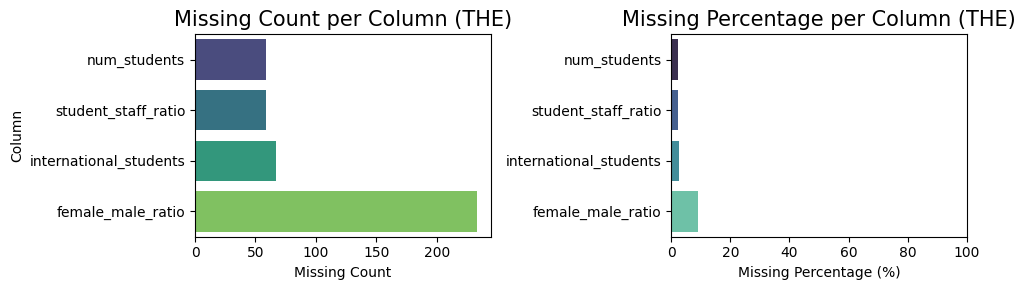


--- Plotting missing data for: ARWU ---


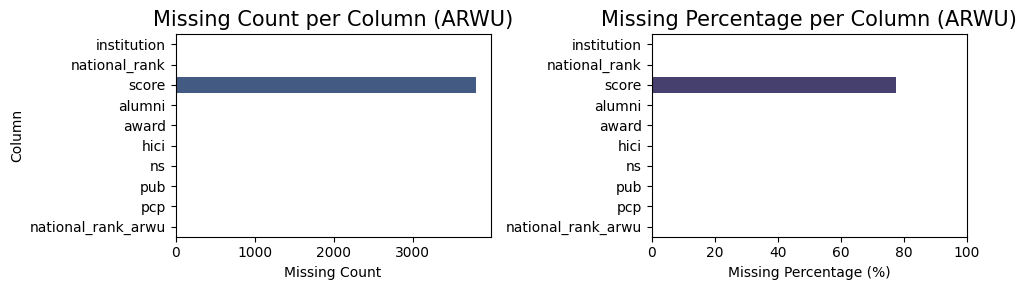


--- Plotting missing data for: CWUR ---


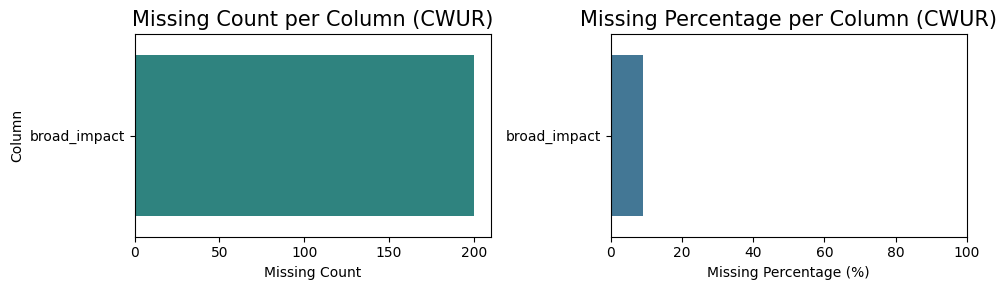

In [ ]:
plot_missing_for_multiple_datasets(
    datasets=[the_df, arwu_df, cwur_df],
    dataset_names=["THE", "ARWU", "CWUR"]
)


In [ ]:
# drop institution == null record
arwu_df.dropna(subset=["institution"], inplace=True)

### THE Missing Data

Several non-essential fields in the THE dataset contain missing values (e.g., num_students, student_staff_ratio, international_students, and especially female_male_ratio). These metrics are optional reporting fields and many institutions do not provide them. Since these values are not required for ranking alignment or merging, **the rows were retained** and the missing values were left as-is.

### ARWU Missing Data
1. **institution** and **national_rank**: One record is missing.
During inspection of the ARWU dataset, one row was found where the institution
column was **missing**. Since institution is a
primary identifier for universities and is required for any meaningful
aggregation, ranking comparison, or merging across datasets, this record cannot
be reliably used.

   Furthermore, because the national ranking of a university cannot be attributed to any institution without this key field, imputation is not feasible.

    Therefore, this row was removed from the dataset.

-----------------
2. The “score” column has a large number of missing values (3796 rows). This is a documented characteristic of the ARWU system, where only the top-ranked institutions are assigned a score. These values were intentionally left missing and not imputed to avoid distorting the ranking methodology.

3. A few other ranking input fields (award, hici, ns, pub, pcp) have small numbers of missing values. Since these variables are not used in the merged analysis, they were kept as-is.

### CWUR Missiong Data

The CWUR dataset is mostly complete except for the “broad_impact” column, which has 200 missing values. Since this metric is not essential for ranking comparison or merging, the records were retained without imputation.

### **2.3.4 Preparing for Dataset Merging**

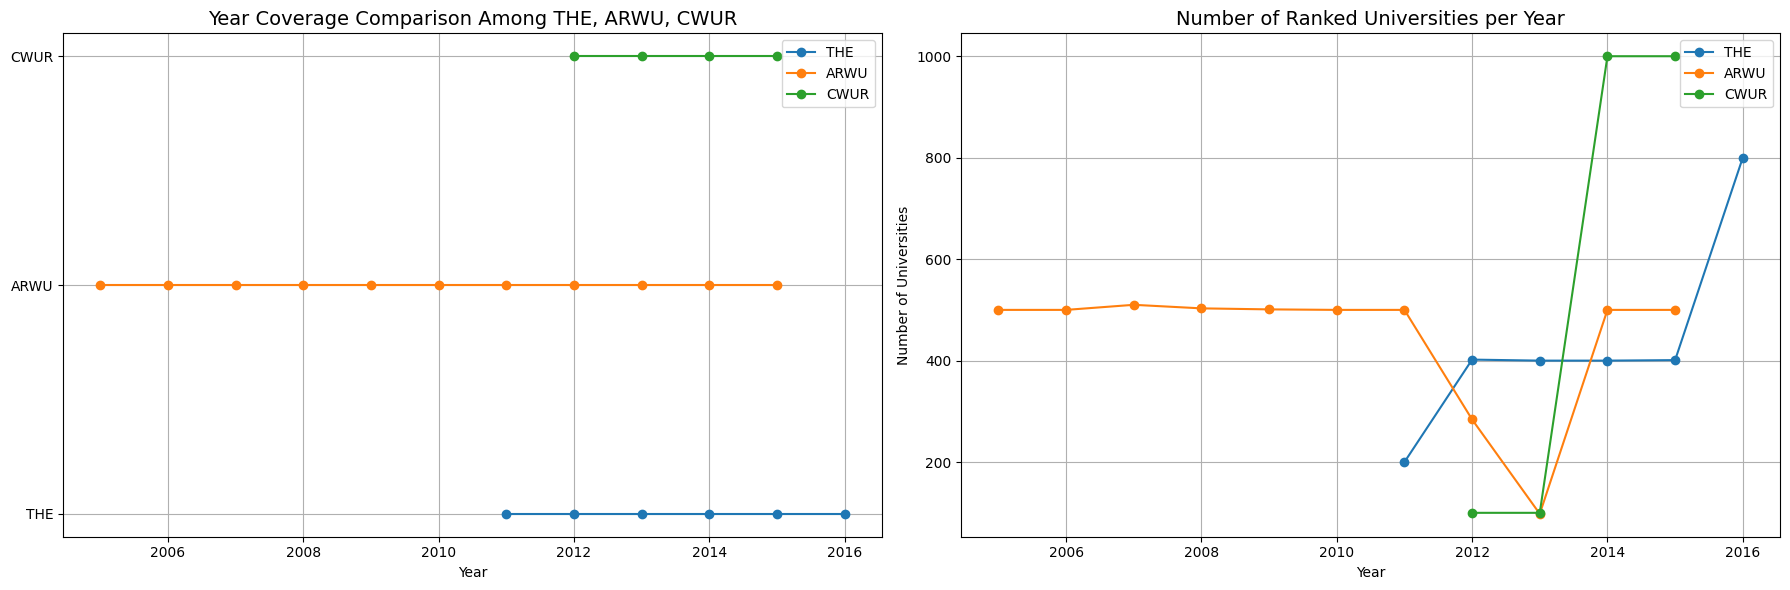

In [ ]:
# -----------------------------
# 1. Prepare year coverage data
# -----------------------------
years_the  = sorted(the_df["year"].unique())
years_arwu = sorted(arwu_df["year"].unique())
years_cwur = sorted(cwur_df["year"].unique())

datasets = ["THE", "ARWU", "CWUR"]
years_list = [years_the, years_arwu, years_cwur]

# -----------------------------
# 2. Prepare per-year school counts
# -----------------------------
the_count  = the_df.groupby("year")["institution"].count()
arwu_count = arwu_df.groupby("year")["institution"].count()
cwur_count = cwur_df.groupby("year")["institution"].count()

# -----------------------------
# 3. Create subplot figure
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# -----------------------------
# Left subplot — Year coverage
# -----------------------------
for i, years in enumerate(years_list):
    axes[0].plot(years, [i+1]*len(years), 'o-', label=datasets[i])

axes[0].set_yticks([1, 2, 3])
axes[0].set_yticklabels(datasets)
axes[0].set_title("Year Coverage Comparison Among THE, ARWU, CWUR", fontsize=14)
axes[0].set_xlabel("Year")
axes[0].grid(True)
axes[0].legend(frameon=True)

# -----------------------------
# Right subplot — School counts per year
# -----------------------------
axes[1].plot(the_count.index, the_count.values, 'o-', label="THE")
axes[1].plot(arwu_count.index, arwu_count.values, 'o-', label="ARWU")
axes[1].plot(cwur_count.index, cwur_count.values, 'o-', label="CWUR")

axes[1].set_title("Number of Ranked Universities per Year", fontsize=14)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Universities")
axes[1].grid(True)
axes[1].legend(frameon=True)




plt.tight_layout()
plt.show()


In [ ]:
arwu_df["year"].value_counts().sort_index()

,count
year,
2005,500
2006,500
2007,510
2008,503
2009,501
2010,500
2011,500
2012,284
2013,98


In [ ]:
common_years = set(the_df.year) & set(arwu_df.year) & set(cwur_df.year)
common_years

{2012, 2013, 2014, 2015}

During the cleaning stage, we identified a major inconsistency:
**ARWU 2012 contains only 284 universities and ARWU 2013 only 99**,
while all other years contain around 500. This suggests incomplete data
and must be considered before performing further analysis.

In this way, **Only 2014 and 2015** should be considered into merged Dataset.



# 2.3 Merge and Pivot

## **Institution Name Normalization (Handling Naming Variations Across Datasets)**
During the data cleaning process, we identified inconsistencies in university names within the ARWU dataset. Specifically, the same institution appeared with different spellings or formatting styles. For example:

**ARWR**

- “University of California, Berkeley” vs “University of California-Berkeley”
- “Massachusetts Institute of Technology (MIT)” vs “Massachusetts Institute of Technology”

- “Texas A&M University, College Station” vs “Texas A&M University – College Station”

- “Indiana University - Bloomington” vs “Indiana University Bloomington”



- “University of Calgary”	vs. ”The University of Calgary”
- ”University of Dundee”	vs. ”The University of Dundee”

**THE**
- “University of Bayreuth”	vs.   ”Bayreuth University”
- ”University of Montpellier”	vs. ”Montpellier University”




In [ ]:
def clean_uni_name(name):
    if not isinstance(name, str):
        return name

    name = name.strip()

    # 1. Remove leading "The "
    if name.lower().startswith("the "):
        name = name[4:]

    # 3. Convert variations like "University of XYZ" vs "XYZ University"
    # (advanced normalization if you want it)

    return name


the_df["institution"] = the_df["institution"].apply(clean_uni_name)
arwu_df["institution"] = arwu_df["institution"].apply(clean_uni_name)
cwur_df["institution"] = cwur_df["institution"].apply(clean_uni_name)

In [ ]:
import re

def clean_institution(name):
    """
    Clean and standardize university names across datasets.

    Handles:
    - Removes parentheses content: (MIT), (Main Campus), etc.
    - Removes commas: ", College Station"
    - Converts dashes: " - " → ", "
    - Removes multiple spaces
    - Strips whitespace
    """

    if pd.isna(name):
        return name

    name = str(name)

    # 1. Remove any content inside parentheses
    name = re.sub(r"\s*\(.*?\)", "", name)

    # 2. Replace dashes with space (e.g., "University - Bloomington")
    name = re.sub(r"\s*[-–—]\s*", ", ", name)

    # 3. Replace commas with space (e.g., "Texas A&M University, College Station")
    name = name.replace(",", " ")

    # 4. Normalize multiple spaces to a single space
    name = re.sub(r"\s+", " ", name)

    # 5. Trim leading/trailing spaces
    name = name.strip()

    return name


In [ ]:
the_df["institution"] = the_df["institution"].apply(clean_institution)
arwu_df["institution"] = arwu_df["institution"].apply(clean_institution)
cwur_df["institution"] = cwur_df["institution"].apply(clean_institution)

In [ ]:
def detect_reverse_names(df):
    names = df["institution"].dropna().unique()
    candidates = []
    for name in names:
        if name.endswith(" University"):
            city = name.replace(" University", "")
            canonical = f"University of {city}"
            if canonical in names:
                candidates.append((name, canonical))
    return candidates


In [ ]:
detect_reverse_names(the_df)

[('Newcastle University', 'University of Newcastle'),
 ('York University', 'University of York'),
 ('Miami University', 'University of Miami')]

In [ ]:
detect_reverse_names(arwu_df)

[('Newcastle University', 'University of Newcastle'),
 ('York University', 'University of York'),
 ('Heidelberg University', 'University of Heidelberg'),
 ('Durham University', 'University of Durham'),
 ('Maastricht University', 'University of Maastricht'),
 ('Bielefeld University', 'University of Bielefeld'),
 ('Pompeu Fabra University', 'University of Pompeu Fabra'),
 ('Paris Dauphine University', 'University of Paris Dauphine')]

In [ ]:
detect_reverse_names(cwur_df)

[('Newcastle University', 'University of Newcastle'),
 ('York University', 'University of York'),
 ('Miami University', 'University of Miami')]

The next step -- exploratory analysis was conducted using the 2015 subset of the ranking data.
This ensures consistency across variables and avoids ambiguities caused by methodological changes or missing values in earlier years.

CWUR  ← left merge ← THE
CWUR  ← left merge ← ARWU


In [ ]:
common_years = {2015}

# Filter datasets to years between 2014 and 2015
# the_f = the_df[(the_df["year"] >= 2014) & (the_df["year"] <= 2015)]
# arwu_f = arwu_df[(arwu_df["year"] >= 2014) & (arwu_df["year"] <= 2015)]
# cwur_f = cwur_df[(cwur_df["year"] >= 2014) & (cwur_df["year"] <= 2015)]
the_f  = the_df[the_df["year"].isin(common_years)]
arwu_f = arwu_df[arwu_df["year"].isin(common_years)]
cwur_f = cwur_df[cwur_df["year"].isin(common_years)]

# the_f = the_f.rename(columns={
#     "world_rank_the	": "rank_the"
# })
# arwu_f = arwu_f.rename(columns={
#     "world_rank_arwu	": "rank_arwu"
# })
cwur_f = cwur_f.rename(columns={
   # "institution": "university_name",
    "world_rank": "world_rank_cwur"
})

# merged_df = (
#     the_f.merge(arwu_f[["institution","year","rank_arwu"]], on=["institution","year"], how="outer")
#            .merge(cwur_f[["institution","year","rank_cwur"]], on=["institution","year"], how="outer")
# )

merge1 = pd.merge(
    the_f[["institution", "year", "world_rank_the"]],
    arwu_f[["institution", "year", "world_rank_arwu"]],
    on=["institution", "year"],
    how="outer"
)

merged_df = pd.merge(
    merge1,
    cwur_f[["institution", "year", "world_rank_cwur"]],
    on=["institution", "year"],
    how="outer"
)

merged_df["mean_rank"] = merged_df[
    ["world_rank_the", "world_rank_arwu", "world_rank_cwur"]
].mean(axis=1)

# merged_df["best_rank"] = merged_df[
#     ["world_rank_the", "world_rank_arwu", "world_rank_cwur"]
# ].min(axis=1)

# merged_df["worst_rank"] = merged_df[
# #     ["world_rank_the", "world_rank_arwu", "world_rank_cwur"]
# ].max(axis=1)





merged_df = cwur_f.copy()
# Merge THE into CWUR base
merged_df = merged_df.merge(
    the_f[["institution", "year", "world_rank_the"]],
    on=["institution", "year"],
    how="left"
)

# Merge ARWU into CWUR base
merged_df = merged_df.merge(
    arwu_f[["institution", "year", "world_rank_arwu"]],
    on=["institution", "year"],
    how="left"
)

merged_df

,world_rank_cwur,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,world_rank_the,world_rank_arwu
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,2,1
1,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,4,2
2,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,6,3
3,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015,5,5
4,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015,<NA>,<NA>
996,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015,<NA>,<NA>
997,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015,<NA>,<NA>
998,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015,<NA>,<NA>


In [ ]:
pivot_rank = merged_df.pivot_table(
    index="institution",
    columns="year",
    values=["world_rank_the", "world_rank_arwu", "world_rank_cwur"]
)

pivot_rank

,world_rank_arwu,world_rank_cwur,world_rank_the
year,2015,2015,2015
institution,,,
AGH University of Science and Technology,<NA>,782.0,<NA>
Aalborg University,301.0,565.0,351.0
Aalto University,401.0,421.0,251.0
Aarhus University,73.0,122.0,153.0
Aberystwyth University,<NA>,814.0,351.0
...,...,...,...
École centrale de Lyon,<NA>,881.0,<NA>
École normale supérieure Paris,<NA>,37.0,<NA>


In [ ]:
merged_df["mean_rank"] = merged_df[["world_rank_the", "world_rank_arwu", "world_rank_cwur"]].mean(axis=1)


In [ ]:
top100 = merged_df.sort_values("mean_rank").head(100)
top100

,world_rank_cwur,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,world_rank_the,world_rank_arwu,mean_rank
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,2,1,1.333333
1,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,4,2,2.666667
2,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,6,3,4.0
3,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015,5,5,4.666667
4,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015,3,10,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,Michigan State University,USA,60,112,162,218,88,123,65,111.0,136,49.74,2015,82,99,99.666667
178,179,Australian National University,Australia,6,196,379,52,130,99,197,188.0,415,47.97,2015,45,77,100.333333
109,110,University of Groningen,Netherlands,4,313,193,196,64,96,68,67.0,316,50.10,2015,117,75,100.666667
80,81,University of Rochester,USA,49,72,53,113,114,118,68,79.0,64,52.03,2015,121,101,101.0


The CWUR, Times, and Shanghai university ranking datasets come from three completely different ranking systems.
Although they all evaluate universities, they differ significantly in:

**1. Ranking methodology**

Each dataset uses its own scoring framework and criteria.
Scores and ranking columns are not comparable across datasets.

**2. Different time ranges**

CWUR: 2012–2015

Times: 2011–2016

Shanghai: 2005–2015

There is no single year that fully overlaps across all datasets.

**3. Risk of incorrect merging**

If we try to merge them into one large table:

Many rows would contain missing values because a university may appear in one ranking but not the others.

Universities may appear multiple times across years, creating many-to-many merge errors.

The resulting table would be large but not meaningful for analysis.

#**Step 3: EDA - Perform exploratory analysis & visualization**




·      Compute the mean, sum, range and other interesting statistics for numeric columns

·      Explore distributions of numeric columns using histograms etc.

·      Explore relationship between columns using scatter plots, bar charts etc.

·      Make a note of interesting insights from the exploratory analysis


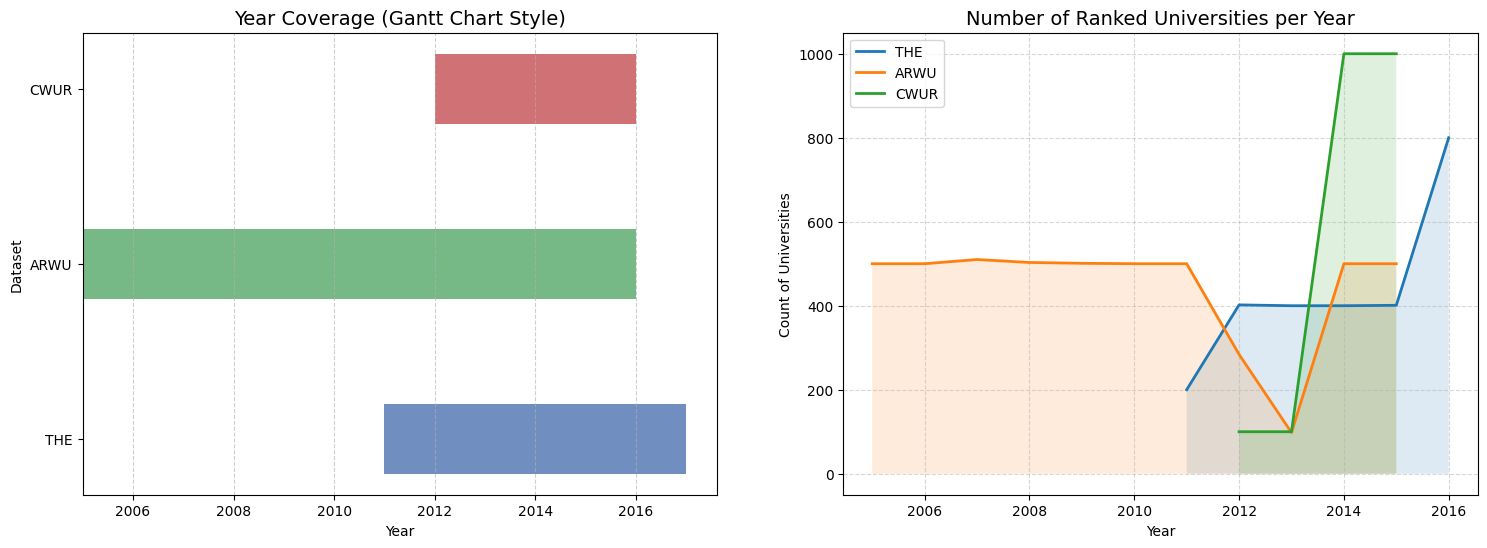

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# -----------------------------
# A. Year coverage — Horizontal bars
# -----------------------------
# -----------------------------
# Left subplot — Year coverage (Gantt style)
# -----------------------------
for i, years in enumerate(years_list):
    start_year = min(years)
    end_year = max(years)

    axes[0].barh(
        y=datasets[i],
        width=end_year - start_year + 1,
        left=start_year,
        height=0.4,
        color=['#4C72B0', '#55A868', '#C44E52'][i],  # optional colors
        alpha=0.8
    )

axes[0].set_title("Year Coverage (Gantt Chart Style)", fontsize=14)
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Dataset")
axes[0].grid(axis='x', linestyle="--", alpha=0.6)

# -----------------------------
# Right subplot — School counts per year (Line + Filled Area)
# -----------------------------
axes[1].plot(the_count.index, the_count.values, label="THE", linewidth=2)
axes[1].fill_between(the_count.index, the_count.values, alpha=0.15)

axes[1].plot(arwu_count.index, arwu_count.values, label="ARWU", linewidth=2)
axes[1].fill_between(arwu_count.index, arwu_count.values, alpha=0.15)

axes[1].plot(cwur_count.index, cwur_count.values, label="CWUR", linewidth=2)
axes[1].fill_between(cwur_count.index, cwur_count.values, alpha=0.15)

axes[1].set_title("Number of Ranked Universities per Year", fontsize=14)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count of Universities")
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend(frameon=True)


##The sharp drop in 2012–2013 clearly indicates dataset incompleteness. As a result, year-to-year comparisons involving ARWU must be interpreted cautiously.


## 3.1 Summary Statistics for Numeric Columns

In [ ]:
# Select numeric columns
the_numeric_cols = the_df.select_dtypes(include=['int64','float64'])

# Compute summary statistics
the_stats = the_numeric_cols.describe().T
the_stats['range'] = the_stats['max'] - the_stats['min']

the_stats

,count,mean,std,min,25%,50%,75%,max,range
teaching,2603.0,37.801498,17.604218,9.9,24.7,33.9,46.4,99.7,89.8
research,2603.0,35.910257,21.254805,2.9,19.6,30.5,47.25,99.4,96.5
citations,2603.0,60.921629,23.073219,1.2,45.5,62.5,79.05,100.0,98.8
student_staff_ratio,2544.0,18.445283,11.458698,0.6,11.975,16.1,21.5,162.6,162.0
year,2603.0,2014.075682,1.685733,2011.0,2013.0,2014.0,2016.0,2016.0,5.0
world_rank_the,2603.0,234.991164,160.721216,1.0,109.0,201.0,301.0,601.0,600.0


In [ ]:
# Select numeric columns
arwu_numeric_cols = arwu_df.select_dtypes(include=['int64','float64'])

# Compute summary statistics
arwu_stats = arwu_numeric_cols.describe().T
arwu_stats['range'] = arwu_stats['max'] - arwu_stats['min']

arwu_stats

,count,mean,std,min,25%,50%,75%,max,range
score,1101.0,36.38347,13.557186,23.5,27.4,31.3,41.8,100.0,76.5
alumni,4896.0,9.161724,14.140636,0.0,0.0,0.0,15.6,100.0,100.0
award,4895.0,7.69191,15.49411,0.0,0.0,0.0,13.4,100.0,100.0
hici,4895.0,16.221491,14.38271,0.0,7.3,12.6,21.7,100.0,100.0
ns,4875.0,16.078503,12.511529,0.0,8.0,12.8,19.8,100.0,100.0
pub,4895.0,38.254648,13.050809,7.3,28.9,36.0,45.3,100.0,92.7
pcp,4895.0,21.242329,9.254351,8.3,15.6,19.0,24.5,100.0,91.7
year,4896.0,2009.657884,3.197546,2005.0,2007.0,2009.0,2012.0,2015.0,10.0
national_rank_arwu,4896.0,28.003472,36.942793,1.0,4.0,10.0,35.0,141.0,140.0
world_rank_arwu,4896.0,207.645833,125.903261,1.0,101.0,201.0,301.0,403.0,402.0


In [ ]:
# Select numeric columns
cwur_numeric_cols = cwur_df.select_dtypes(include=['int64','float64'])

# Compute summary statistics
cwur_stats = cwur_numeric_cols.describe().T
cwur_stats['range'] = cwur_stats['max'] - cwur_stats['min']

cwur_stats

,count,mean,std,min,25%,50%,75%,max,range
world_rank,2200.0,459.590909,304.320363,1.00,175.75,450.5,725.250,1000.0,999.00
national_rank,2200.0,40.278182,51.740870,1.00,6.00,21.0,49.000,229.0,228.00
quality_of_education,2200.0,275.100455,121.935100,1.00,175.75,355.0,367.000,367.0,366.00
alumni_employment,2200.0,357.116818,186.779252,1.00,175.75,450.5,478.000,567.0,566.00
quality_of_faculty,2200.0,178.888182,64.050885,1.00,175.75,210.0,218.000,218.0,217.00
publications,2200.0,459.908636,303.760352,1.00,175.75,450.5,725.000,1000.0,999.00
influence,2200.0,459.797727,303.331822,1.00,175.75,450.5,725.250,991.0,990.00
citations,2200.0,413.417273,264.366549,1.00,161.00,406.0,645.000,812.0,811.00
broad_impact,2000.0,496.699500,286.919755,1.00,250.50,496.0,741.000,1000.0,999.00
patents,2200.0,433.346364,273.996525,1.00,170.75,426.0,714.250,871.0,870.00


In [ ]:
# Select numeric columns
merged_numeric_cols = merged_df.select_dtypes(include=['int64','float64'])

# Compute summary statistics
merged_stats = merged_numeric_cols.describe().T
merged_stats['range'] = merged_stats['max'] - merged_stats['min']

merged_stats

,count,mean,std,min,25%,50%,75%,max,range
world_rank_cwur,1000.0,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0,999.0
national_rank,1000.0,42.512,53.457774,1.0,7.0,22.0,52.0,229.0,228.0
quality_of_education,1000.0,299.839,109.137446,1.0,250.75,367.0,367.0,367.0,366.0
alumni_employment,1000.0,406.536,186.782779,1.0,250.75,500.5,567.0,567.0,566.0
quality_of_faculty,1000.0,194.253,53.709214,1.0,218.0,218.0,218.0,218.0,217.0
publications,1000.0,500.419,288.760066,1.0,250.75,500.5,750.0,1000.0,999.0
influence,1000.0,500.275,288.465949,1.0,250.75,500.5,750.25,991.0,990.0
citations,1000.0,451.334,252.090134,1.0,234.0,428.0,645.0,812.0,811.0
broad_impact,1000.0,496.664,286.957784,1.0,250.0,495.0,741.0,1000.0,999.0
patents,1000.0,491.674,275.904565,1.0,250.75,500.5,749.0,871.0,870.0


In [ ]:
merged_df.describe()

,world_rank_cwur,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,world_rank_the,world_rank_arwu,mean_rank
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,341.0,416.0,1000.0
mean,500.500000,42.512000,299.839000,406.536000,194.253000,500.419000,500.275000,451.334000,496.664000,491.674000,46.863850,2015.0,191.530792,214.701923,476.505167
std,288.819436,53.457774,109.137446,186.782779,53.709214,288.760066,288.465949,252.090134,286.957784,275.904565,6.509912,0.0,105.696248,125.00214,284.924407
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.020000,2015.0,1.0,1.0,1.333333
25%,250.750000,7.000000,250.750000,250.750000,218.000000,250.750000,250.750000,234.000000,250.000000,250.750000,44.300000,2015.0,103.0,101.0,234.75
50%,500.500000,22.000000,367.000000,500.500000,218.000000,500.500000,500.500000,428.000000,495.000000,500.500000,44.780000,2015.0,200.0,201.0,443.5
75%,750.250000,52.000000,367.000000,567.000000,218.000000,750.000000,750.250000,645.000000,741.000000,749.000000,46.542500,2015.0,276.0,301.0,724.25
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.0,351.0,401.0,1000.0


The table above summarizes the numeric columns in the combined dataset.
We observe differences in rank distributions across THE, ARWU, and CWUR.
The ranges also indicate that not all ranking systems include the same number of universities.


## 3.2 Compute additional statistics (mean, sum, range)

In [ ]:
numeric_cols = ["world_rank_the", "world_rank_arwu", "world_rank_cwur", "mean_rank"]

stats_df = merged_df[numeric_cols].agg(['mean', 'sum', 'min', 'max', 'median'])
stats_df


,world_rank_the,world_rank_arwu,world_rank_cwur,mean_rank
mean,191.530792,214.701923,500.5,476.505167
sum,65312.000000,89316.000000,500500.0,476505.166667
min,1.000000,1.000000,1.0,1.333333
max,351.000000,401.000000,1000.0,1000.000000
median,200.000000,201.000000,500.5,443.500000


We computed additional statistics (mean, sum, min, max, median).
These statistics help us understand the distribution and central tendency of rankings.


## 3.3 Explore distributions using histograms

This Analysis is based On merged_df, a combined data in the year of 2015.

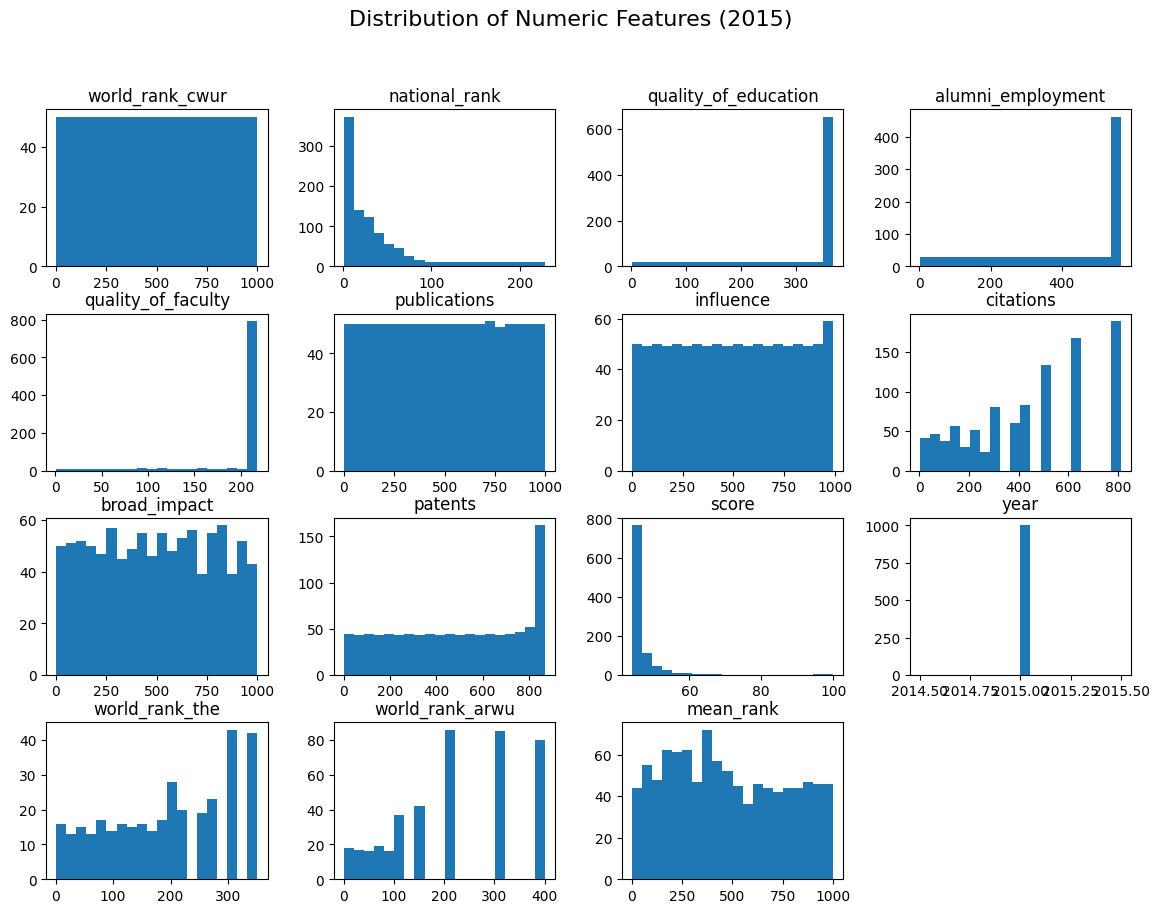

In [ ]:

merged_numeric_cols.hist(figsize=(14,10), bins=20, grid=False)
plt.suptitle("Distribution of Numeric Features (2015)", fontsize=16)
plt.show()

In [ ]:
merged_numeric_cols = merged_numeric_cols.drop(columns=["year"])

## Several research-output variables (e.g., publications, citations) show extreme right-skewness and heavy-tailed behavior.
## To improve interpretability and produce a more informative histogram, we plotted these variables using a log-scaled axis (log1p transformation).

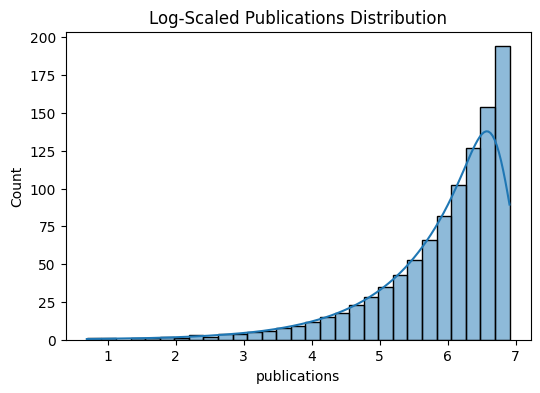

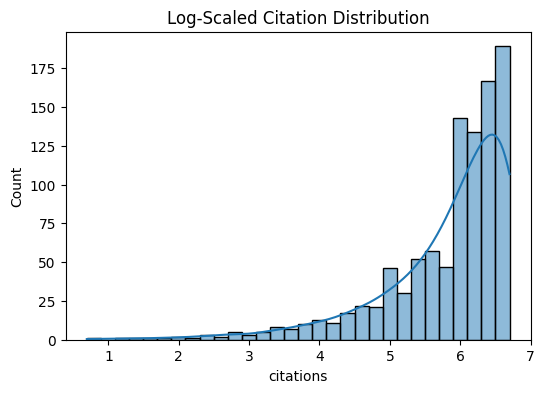

In [ ]:
# Use log-scale to correct for heavy-tailed distribution in publications and citations
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(merged_numeric_cols["publications"]), kde=True)
plt.title("Log-Scaled Publications Distribution")
plt.show()

# Use log-scale to correct for heavy-tailed distribution in publications and citations
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(merged_numeric_cols["citations"]), kde=True)
plt.title("Log-Scaled Citation Distribution")
plt.show()

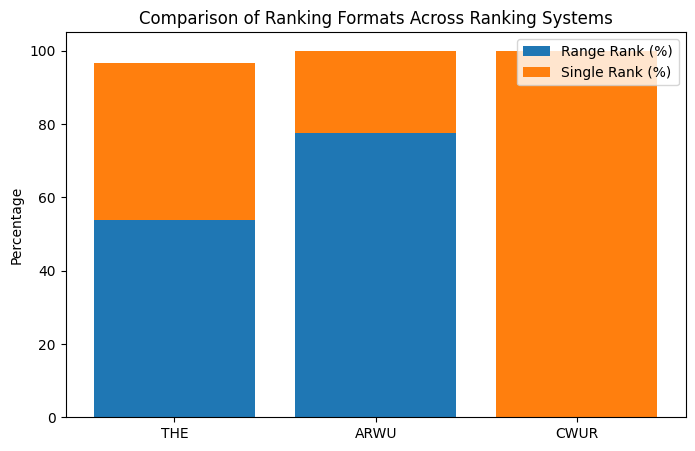

In [ ]:
# world_rank single or range

def classify_rank(x):
    """
    Return category:
    - 'range'  → contains "-"
    - 'tie'    → starts with "="
    - 'single' → pure number
    - 'other'  → anything else
    """
    if pd.isna(x):
        return "missing"

    s = str(x).strip()

    if s.startswith("="):
        return "tie"
    if "-" in s:
        return "range"
    if s.replace(".", "", 1).isdigit():  # 1 / 1.0 / 23.0
        return "single"
    return "other"


the_org_df["rank_type"] = the_org_df["world_rank"].apply(classify_rank)
rank_stats = the_org_df["rank_type"].value_counts(normalize=True) * 100
rank_stats

arwu_org_df["rank_type"] = arwu_org_df["world_rank"].apply(classify_rank)
rank_stats = arwu_org_df["rank_type"].value_counts(normalize=True) * 100
rank_stats

cwur_org_df["rank_type"] = cwur_org_df["world_rank"].apply(classify_rank)
rank_stats = cwur_org_df["rank_type"].value_counts(normalize=True) * 100
rank_stats



systems = ["THE", "ARWU", "CWUR"]
range_pct = [53.86, 77.50, 0]
single_pct = [42.72, 22.50, 100]

plt.figure(figsize=(8,5))
plt.bar(systems, range_pct, label="Range Rank (%)")
plt.bar(systems, single_pct, bottom=range_pct, label="Single Rank (%)")

plt.title("Comparison of Ranking Formats Across Ranking Systems")
plt.ylabel("Percentage")
plt.legend()
plt.show()




**Ranking Format Varies Significantly Across Systems**

A comparative analysis of ranking formats reveals major structural differences among THE, ARWU, and CWUR:

THE uses a mix of exact ranks, tied ranks, and wide rank ranges, with 53.9% of entries recorded as ranges, indicating lower resolution for many institutions.

ARWU relies even more heavily on rank ranges, with 77.5% of ranks given as intervals, showing that ARWU intentionally groups institutions rather than providing a precise ordering.

CWUR is the only ranking system providing a full continuous ranking (100% single ranks), offering the highest level of ranking granularity.

➡ Conclusion:
CWUR gives precise rank ordering,
THE gives moderate detail,
ARWU gives very coarse ranking information.
A large proportion of THE and ARWU rankings are reported as ranges such as “201–250”, limiting their comparability and preventing direct numerical analysis.
This observation suggests that additional preprocessing is required.

The histograms show that all three ranking systems are heavily right-skewed:
most universities rank below the top 500, with a small number of elite institutions dominating the top positions.


We observe a positive relationship between THE and ARWU rankings.
Highly ranked universities in one system tend to perform well in the other.
However, the spread indicates methodological differences between ranking systems.

## 3.5 Bar chart: Number of universities per year per ranking

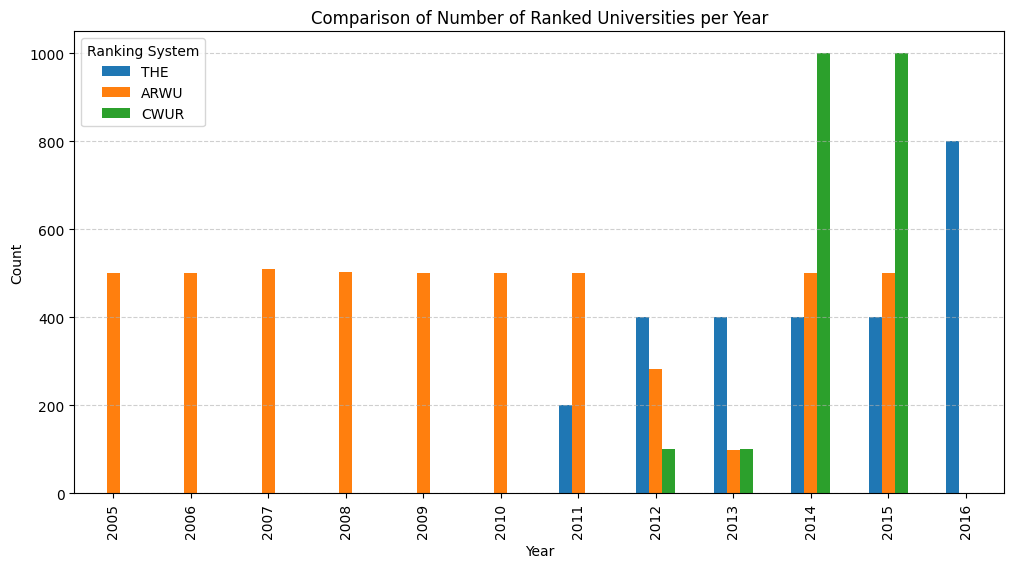

In [ ]:
the_cnt  = the_df.groupby("year")["institution"].count().rename("THE")
arwu_cnt = arwu_df.groupby("year")["institution"].count().rename("ARWU")
cwur_cnt = cwur_df.groupby("year")["institution"].count().rename("CWUR")

all_years = sorted(set(the_cnt.index) | set(arwu_cnt.index) | set(cwur_cnt.index))

count_comp = pd.concat([the_cnt, arwu_cnt, cwur_cnt], axis=1)
count_comp = count_comp.reindex(all_years)

count_comp.plot(kind="bar", figsize=(12,6))
plt.title("Comparison of Number of Ranked Universities per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Ranking System")
plt.show()

**Insight：Coverage varies significantly across ranking systems**

ARWU consistently lists 500 universities except for two anomaly years (2012–2013).

THE lists fewer institutions but increased to nearly 800 after 2015.

CWUR rapidly expanded its dataset, reaching ~1000 universities by 2015–2016.


- THE ranks fewer universities than ARWU and CWUR each year.
This aligns with known criticisms that THE uses selective inclusion criteria.

## 3.6 Histogram: Score Distribution

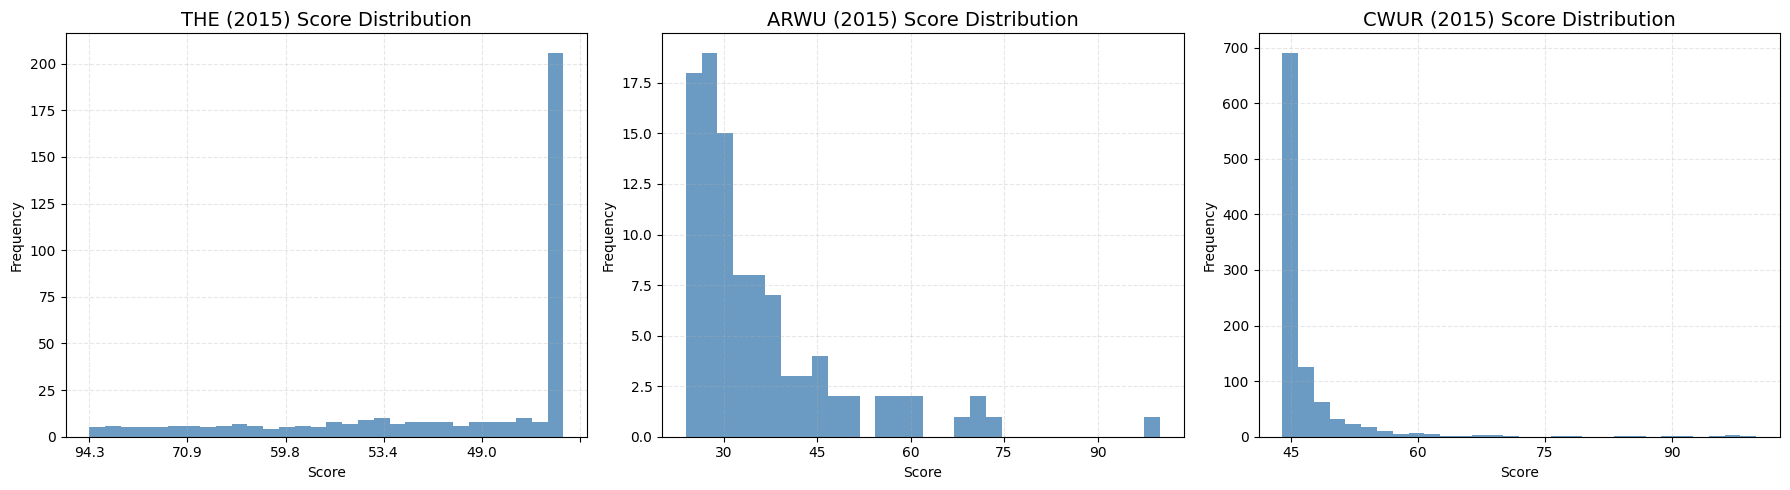

In [ ]:
# 1. Filter for year = 2015
the_2015  = the_df[the_df["year"] == 2015]["score"]
arwu_2015 = arwu_df[arwu_df["year"] == 2015]["score"]
cwur_2015 = cwur_df[cwur_df["year"] == 2015]["score"]

dfs_2015 = {
    "THE (2015)": the_2015,
    "ARWU (2015)": arwu_2015,
    "CWUR (2015)": cwur_2015
}

# 2. Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

data_2015 = {
    "THE (2015)": the_2015,
    "ARWU (2015)": arwu_2015,
    "CWUR (2015)": cwur_2015
}

for ax, (name, series) in zip(axes, data_2015.items()):
    ax.hist(series, bins=30, color="steelblue", alpha=0.8)
    ax.set_title(f"{name} Score Distribution", fontsize=14)
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

    ax.xaxis.set_major_locator(plt.MaxNLocator(6))

    ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


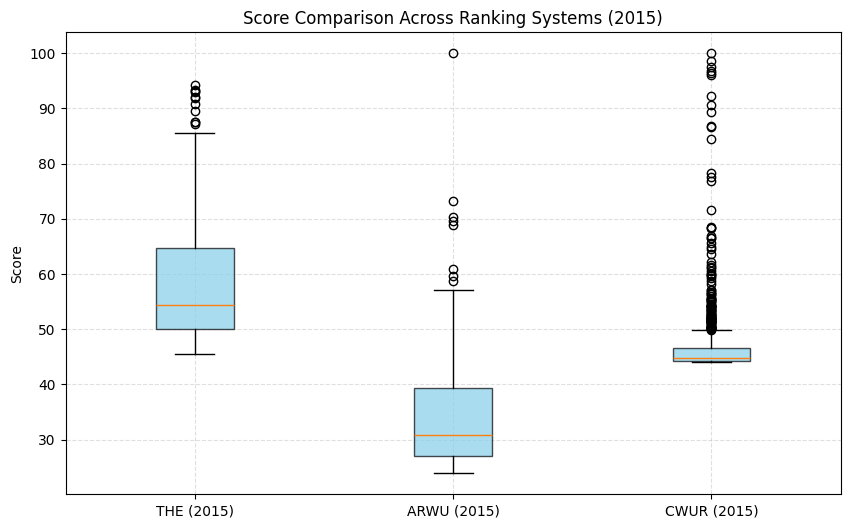

In [ ]:
def clean_score(series):
    return (
        series.astype(str)
              .str.strip()
              .replace({'–': None, '-': None, '': None})
              .replace(r'[^0-9\.]', '', regex=True)
    )


def to_numeric(series):
    return pd.to_numeric(series, errors="coerce")

the_2015_clean  =  (
    to_numeric(clean_score(the_2015))
    .dropna()
)
arwu_2015_clean = (
    to_numeric(clean_score(arwu_2015))
    .dropna()
)
cwur_2015_clean = to_numeric(clean_score(cwur_2015))


plt.figure(figsize=(10,6))

plt.boxplot(
    [the_2015_clean, arwu_2015_clean, cwur_2015_clean],
    tick_labels=["THE (2015)", "ARWU (2015)", "CWUR (2015)"],
    patch_artist=True,
    boxprops=dict(facecolor="skyblue", alpha=0.7)
)

plt.title("Score Comparison Across Ranking Systems (2015)")
plt.ylabel("Score")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


The boxplot compares the distribution of total_score across the three ranking systems (CWUR, Times, Shanghai) for the aligned year range 2012–2015.

**CWUR**

* Scores are highly concentrated between 45–50, producing a narrow box.

* Many outliers appear above 50, indicating only a limited group of top universities exceed average performance.

* This reflects CWUR’s tightly compressed scoring scale.

**Times**

* The widest distribution among the three systems.

* Scores range from 40 to nearly 90, showing substantial variability across institutions.

* Suggests that Times ranking captures a broader spread of university performance, emphasizing multiple academic dimensions.

**Shanghai**

* Median score is significantly lower (around 30).

* Distribution is right-skewed with many low-scoring universities and only a few elite research universities scoring above 60.

* This matches Shanghai’s methodology, which heavily weighs Nobel Prizes, research citations (HiCi), and publications.

**Overall Insight**

These distributions highlight that the three ranking systems use fundamentally different scoring methodologies, making their score scales not directly comparable.
However, comparing their shapes reveals meaningful differences in how each system evaluates global universities.

In [ ]:
stats_df = pd.DataFrame({
    "THE": the_2015_clean.describe(),
    "ARWU": arwu_2015_clean.describe(),
    "CWUR": cwur_2015_clean.describe()
})

stats_df


,THE,ARWU,CWUR
count,201.000000,100.000000,1000.000000
mean,58.940796,35.870000,46.863850
std,12.239997,13.274716,6.509912
min,45.600000,23.900000,44.020000
25%,50.100000,27.000000,44.300000
50%,54.300000,30.750000,44.780000
75%,64.700000,39.325000,46.542500
max,94.300000,100.000000,100.000000


/tmp/ipython-input-3973854357.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(the_2015_clean, label="THE", shade=True)
/tmp/ipython-input-3973854357.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(arwu_2015_clean, label="ARWU", shade=True)
/tmp/ipython-input-3973854357.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cwur_2015_clean, label="CWUR", shade=True)


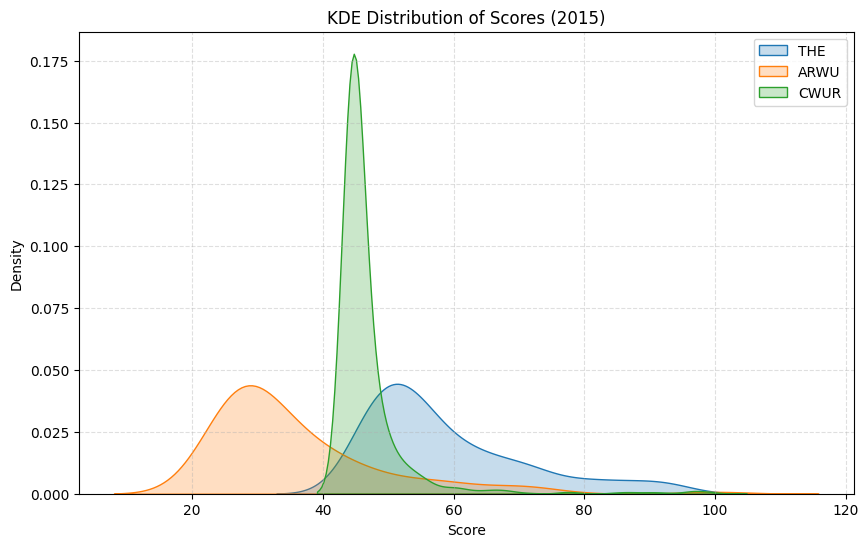

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(the_2015_clean, label="THE", shade=True)
sns.kdeplot(arwu_2015_clean, label="ARWU", shade=True)
sns.kdeplot(cwur_2015_clean, label="CWUR", shade=True)

plt.title("KDE Distribution of Scores (2015)")
plt.xlabel("Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

print("THE Outliers:", count_outliers(the_2015_clean))
print("ARWU Outliers:", count_outliers(arwu_2015_clean))
print("CWUR Outliers:", count_outliers(cwur_2015_clean))


THE Outliers: 11
ARWU Outliers: 8
CWUR Outliers: 113


In [ ]:
def find_outliers(df, score_col, university_col="institution"):
    """
    Detect outliers using IQR rule:
    outliers < Q1 - 1.5*IQR  OR  outliers > Q3 + 1.5*IQR
    Automatically handles '-', blanks, and non-numeric values.
    """

    # Step 1: Clean score column → convert to numeric
    clean_score = pd.to_numeric(df[score_col], errors="coerce")

    # Step 2: Drop NaN for IQR computation
    valid = clean_score.dropna()

    Q1 = valid.quantile(0.25)
    Q3 = valid.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Step 3: Identify outliers (using cleaned numeric values)
    mask = (clean_score < lower) | (clean_score > upper)

    # Step 4: Return rows with original school name + numeric score
    result = df.loc[mask].copy()
    result["numeric_score"] = clean_score[mask]

    return result



In [ ]:
the_2015_df = the_df[the_df["year"] == 2015]
the_outliers = find_outliers(the_2015_df, "score")
the_outliers[["institution", "score"]].sort_values("score")


,institution,score
1412,University of Chicago,87.1
1410,Imperial College London,87.5
1411,Yale University,87.5
1409,University of California Berkeley,89.5
1408,Princeton University,90.9
1407,Massachusetts Institute of Technology,91.9
1406,University of Cambridge,92.0
1405,Stanford University,92.9
1404,University of Oxford,93.2
1403,Harvard University,93.3


In [ ]:
arwu_2015_df = arwu_df[arwu_df["year"] == 2015]
arwu_outliers = find_outliers(arwu_2015_df, "score")
arwu_outliers[["institution", "numeric_score"]].sort_values("numeric_score")


,institution,numeric_score
4404,Columbia University,58.8
4403,California Institute of Technology,59.6
4402,Princeton University,61.0
4401,University of Cambridge,68.8
4400,University of California Berkeley,69.6
4399,Massachusetts Institute of Technology,70.4
4398,Stanford University,73.3
4397,Harvard University,100.0


In [ ]:
cwur_2015_df = cwur_df[cwur_df["year"] == 2015]
cwur_outliers = find_outliers(cwur_2015_df, "score")
cwur_outliers[["institution", "numeric_score"]].sort_values("numeric_score")


,institution,numeric_score
1312,Georgetown University,49.92
1311,Sapienza University of Rome,49.97
1310,University of Helsinki,50.04
1309,University of Groningen,50.10
1308,Tokyo Institute of Technology,50.13
...,...,...
1204,University of Oxford,96.46
1203,University of Cambridge,96.81
1202,Massachusetts Institute of Technology,97.54
1201,Stanford University,98.66


CWUR exhibits an extremely compressed score distribution, where most universities fall in a narrow band between 44 and 47. This yields an unusually small IQR, causing the upper-bound of outlier detection to be only around 50. Since CWUR assigns significantly higher scores only to top global institutions, all elite universities appear as outliers under the IQR rule.

Therefore, the unusually high number of outliers in CWUR is not a data error—it reflects the inherent design of the CWUR scoring scale.

##3.4 Relationship Between Variables (Scatter Plots)

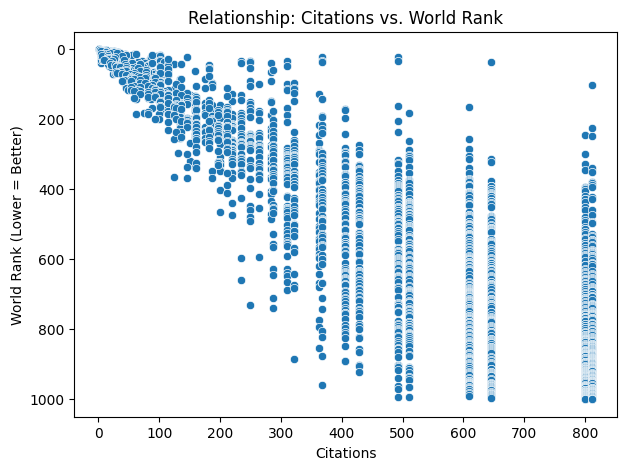

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=cwur_df, x='citations', y='world_rank')
plt.title("Relationship: Citations vs. World Rank")
plt.xlabel("Citations")
plt.ylabel("World Rank (Lower = Better)")
plt.gca().invert_yaxis()  # rank 1 should be at the top
plt.show()


There is a clear inverse relationship:
universities with more citations tend to have better (lower) world_rank.

## Correlation Heatmap

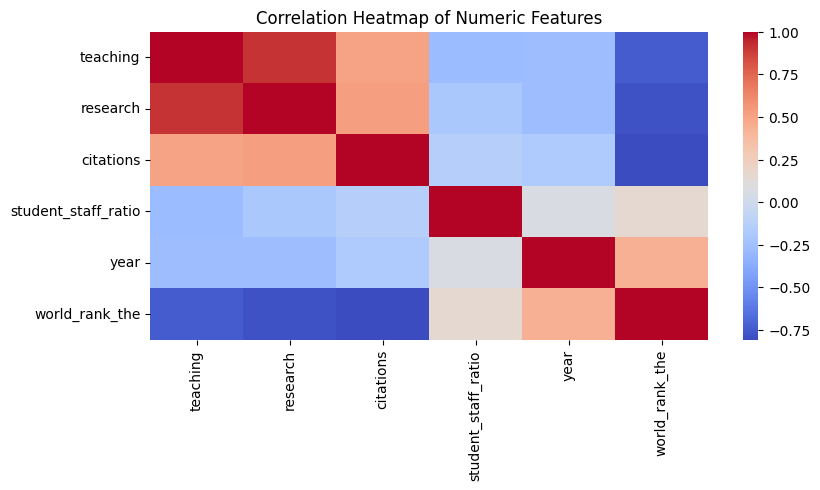

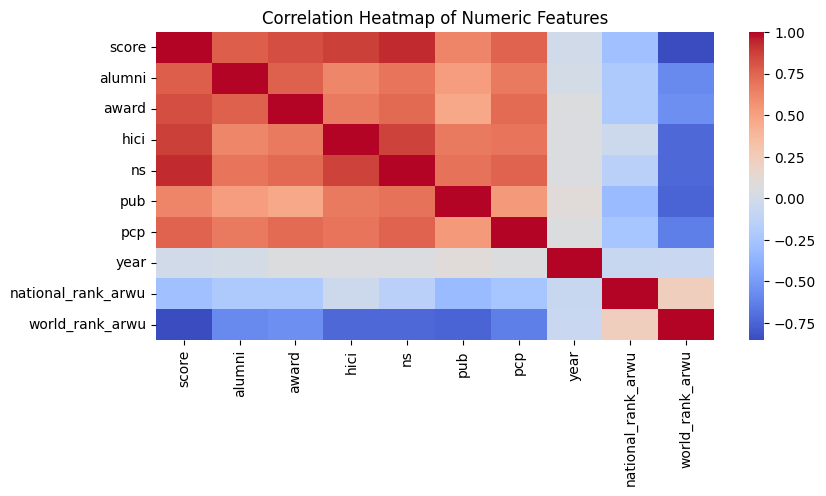

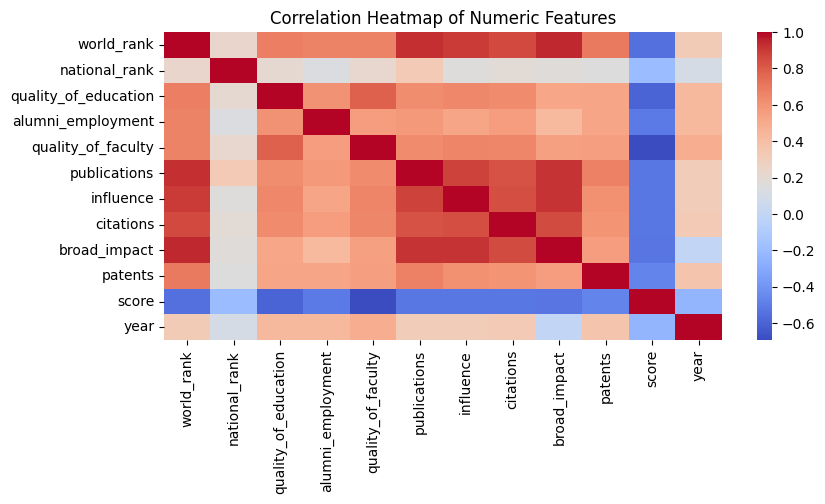

In [ ]:
numeric_cols = the_numeric_cols

plt.figure(figsize=(9,4))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

numeric_cols = arwu_numeric_cols

plt.figure(figsize=(9,4))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

numeric_cols = cwur_numeric_cols

plt.figure(figsize=(9,4))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

citations, influence, publications are strongly correlated.

This suggests these variables measure similar aspects of research strength.

world_rank is moderately correlated with these metrics.

## Question 1: Top Countries by Number of Top Universities

Number of universities before filtering: 1000
Number of universities after filtering: 263

Top 10 Universities by mean_rank:
                              institution         country  mean_rank
0                      Harvard University             USA   1.333333
1                     Stanford University             USA   2.666667
2   Massachusetts Institute of Technology             USA        4.0
3                 University of Cambridge  United Kingdom   4.666667
4                    University of Oxford  United Kingdom        6.0
6       University of California Berkeley             USA   6.333333
11     California Institute of Technology             USA   6.666667
8                    Princeton University             USA   7.333333
5                     Columbia University             USA   9.333333
7                   University of Chicago             USA   9.333333

Top Countries Represented in the Top 100:
country
USA               45
United Kingdom    10
Canada             6
Au

/tmp/ipython-input-2382122168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df["mean_rank"] = complete_df[
/tmp/ipython-input-2382122168.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


<Figure size 1000x800 with 0 Axes>

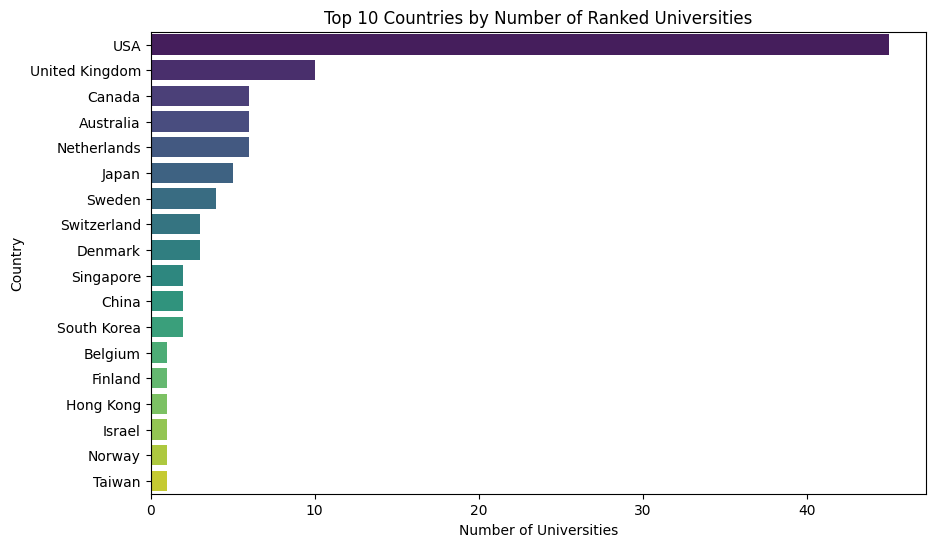

In [ ]:
# ----------------------------------------------------
# 1. Keep only universities that appear in ALL THREE
#    global ranking systems: CWUR, THE, and ARWU.
#    These institutions form a consistent cross-ranking
#    comparison set and are meaningful for mean ranking.
# ----------------------------------------------------
complete_df = merged_df.dropna(
    subset=["world_rank_cwur", "world_rank_the", "world_rank_arwu"],
    how="any"
)

print("Number of universities before filtering:", len(merged_df))
print("Number of universities after filtering:", len(complete_df))


# ----------------------------------------------------
# 2. Recalculate mean_rank (as a safety step)
#    mean_rank = average of CWUR, THE, and ARWU ranks.
# ----------------------------------------------------
complete_df["mean_rank"] = complete_df[
    ["world_rank_cwur", "world_rank_the", "world_rank_arwu"]
].mean(axis=1)


# ----------------------------------------------------
# 3. Sort the filtered universities by mean_rank
#    Lower mean_rank = better overall performance.
# ----------------------------------------------------
complete_df = complete_df.sort_values(by="mean_rank", ascending=True)


# ----------------------------------------------------
# 4. Select the Top 100 universities based on mean_rank
# ----------------------------------------------------
top100 = complete_df.head(100)

print("\nTop 10 Universities by mean_rank:")
print(top100[["institution", "country", "mean_rank"]].head(10))


# ----------------------------------------------------
# 5. Count how many Top-100 universities each country has
#    nunique() ensures no duplicates are counted.
# ----------------------------------------------------
top_countries = (
    top100.groupby("country")["institution"]
    .nunique()
    .sort_values(ascending=False)
)

print("\nTop Countries Represented in the Top 100:")
print(top_countries)


# ----------------------------------------------------
# 6. Create a dictionary mapping each country to its list
#    of Top-100 universities.
# ----------------------------------------------------
country_university_list = (
    top100.groupby("country")["institution"]
    .apply(list)
)

print("\nCountry → List of Universities (Top 100):")
for country, univ_list in country_university_list.items():
    print(f"\n{country} ({len(univ_list)} universities):")
    for u in univ_list:
        print("  -", u)


# ----------------------------------------------------
# 7. Visualization: Bar plot of Top Countries
# ----------------------------------------------------
plt.figure(figsize=(10,8))

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Number of Ranked Universities")
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.show()


# top_countries.plot(kind="barh", color="royalblue")

# plt.title("Top Countries by Number of Universities (Top 100 by Mean Rank)")
# plt.xlabel("Number of Universities")
# plt.ylabel("Country")

# plt.gca().invert_yaxis()   # Invert y-axis so the best country appears at the top

# plt.tight_layout()
# plt.show()


- The United States dominates with the most ranked universities.

- Countries like UK, Canada follow behind.

- Indicates global concentration of higher education institutions.

## Question 2: Which universities appear in two global rankings but are missing from the third?

In [ ]:
# Universities appearing in THE and ARWU
the_arwu = merged_df.dropna(subset=["world_rank_the", "world_rank_arwu"])

# Universities missing from CWUR
the_arwu_not_cwur = the_arwu[the_arwu["world_rank_cwur"].isna()]
print(the_arwu_not_cwur [["institution", "country"]].count())
the_arwu_not_cwur[["institution", "country", "world_rank_the", "world_rank_arwu"]].head(20)



institution    0
country        0
dtype: int64


,institution,country,world_rank_the,world_rank_arwu


In [ ]:
arwu_cwur = merged_df.dropna(subset=["world_rank_arwu", "world_rank_cwur"])
arwu_cwur_not_the = arwu_cwur[arwu_cwur["world_rank_the"].isna()]

arwu_cwur_not_the[["institution", "country"]].head(20)


,institution,country
18,University of Michigan Ann Arbor,USA
25,University of California San Francisco,USA
28,Rockefeller University,USA
33,Keio University,Japan
38,Weizmann Institute of Science,Israel
42,Purdue University West Lafayette,USA
45,University of Pittsburgh Pittsburgh Campus,USA
46,Pennsylvania State University University Park,USA
47,University of Minnesota Twin Cities,USA
48,Ohio State University Columbus,USA


In [ ]:

the_cwur = merged_df.dropna(subset=["world_rank_the", "world_rank_cwur"])
the_cwur_not_arwu = the_cwur[the_cwur["world_rank_arwu"].isna()]

the_cwur_not_arwu[["institution", "country"]].head(20)


,institution,country
34,Imperial College London,United Kingdom
35,École Polytechnique,France
37,Waseda University,Japan
53,University of Colorado Boulder,USA
58,Lomonosov Moscow State University,Russia
62,Pierre and Marie Curie University,France
84,Erasmus University Rotterdam,Netherlands
100,Technical University of Munich,Germany
103,Mines ParisTech,France
130,Paris Diderot University Paris 7,France


In [ ]:
count_the_arwu_not_cwur = len(the_arwu_not_cwur)
count_arwu_cwur_not_the = len(arwu_cwur_not_the)
count_the_cwur_not_arwu = len(the_cwur_not_arwu)

print("THE & ARWU but NOT CWUR:", count_the_arwu_not_cwur)
print("ARWU & CWUR but NOT THE:", count_arwu_cwur_not_the)
print("THE & CWUR but NOT ARWU:", count_the_cwur_not_arwu)


THE & ARWU but NOT CWUR: 0
ARWU & CWUR but NOT THE: 153
THE & CWUR but NOT ARWU: 78


THE and ARWU do not share any universities that CWUR does not also include, but both exclude different sets of institutions compared with CWUR.

153 universities appear in ARWU and CWUR but not in THE

78 universities appear in THE and CWUR but not in ARWU



**Why is THE missing 153 universities?**

Because THE is selective:

- Requires institutions to submit data

- Requires specific teaching, research, citation, and reputation metrics

- Some universities choose not to participate

- Some universities do not meet THE's threshold for inclusion

Thus many universities that appear in ARWU and CWUR do not appear in THE.

#Question 3: Which universities have the biggest ranking differences?

In [ ]:
# Keep only universities with all three rankings
df_gap = merged_df.dropna(
    subset=["world_rank_cwur", "world_rank_the", "world_rank_arwu"]
).copy()   # <-- important to avoid SettingWithCopyWarning

# Compute rank differences (max - min)
df_gap.loc[:, "rank_range"] = (
    df_gap[["world_rank_cwur", "world_rank_the", "world_rank_arwu"]].max(axis=1)
    - df_gap[["world_rank_cwur", "world_rank_the", "world_rank_arwu"]].min(axis=1)
)

# Standard deviation of the 3 rankings
df_gap.loc[:, "rank_std"] = df_gap[
    ["world_rank_cwur", "world_rank_the", "world_rank_arwu"]
].std(axis=1)

# Variance of the 3 rankings
df_gap.loc[:, "rank_var"] = df_gap[
    ["world_rank_cwur", "world_rank_the", "world_rank_arwu"]
].var(axis=1)

# Sort by largest ranking gap
largest_gaps = df_gap.sort_values("rank_range", ascending=False)

# Display top 20 universities with biggest ranking differences
largest_gaps[[
    "institution", "country",
    "world_rank_cwur", "world_rank_the", "world_rank_arwu",
    "rank_range", "rank_std"
]].head(20)



,institution,country,world_rank_cwur,world_rank_the,world_rank_arwu,rank_range,rank_std
870,Northeastern University,China,871,185,201,686,391.525223
814,University of Technology Sydney,Australia,815,226,301,589,320.609316
696,Sharif University of Technology,Iran,697,301,401,396,205.925553
594,Curtin University,Australia,595,351,201,394,198.860085
687,Swinburne University of Technology,Australia,688,351,301,387,210.490697
592,Carleton University,Canada,593,226,401,367,183.56561
620,Queensland University of Technology,Australia,621,276,401,345,174.666349
631,University of Essex,United Kingdom,632,301,401,331,169.765525
425,Lancaster University,United Kingdom,426,131,301,295,148.070929
462,Syracuse University,USA,463,177,401,286,150.45265


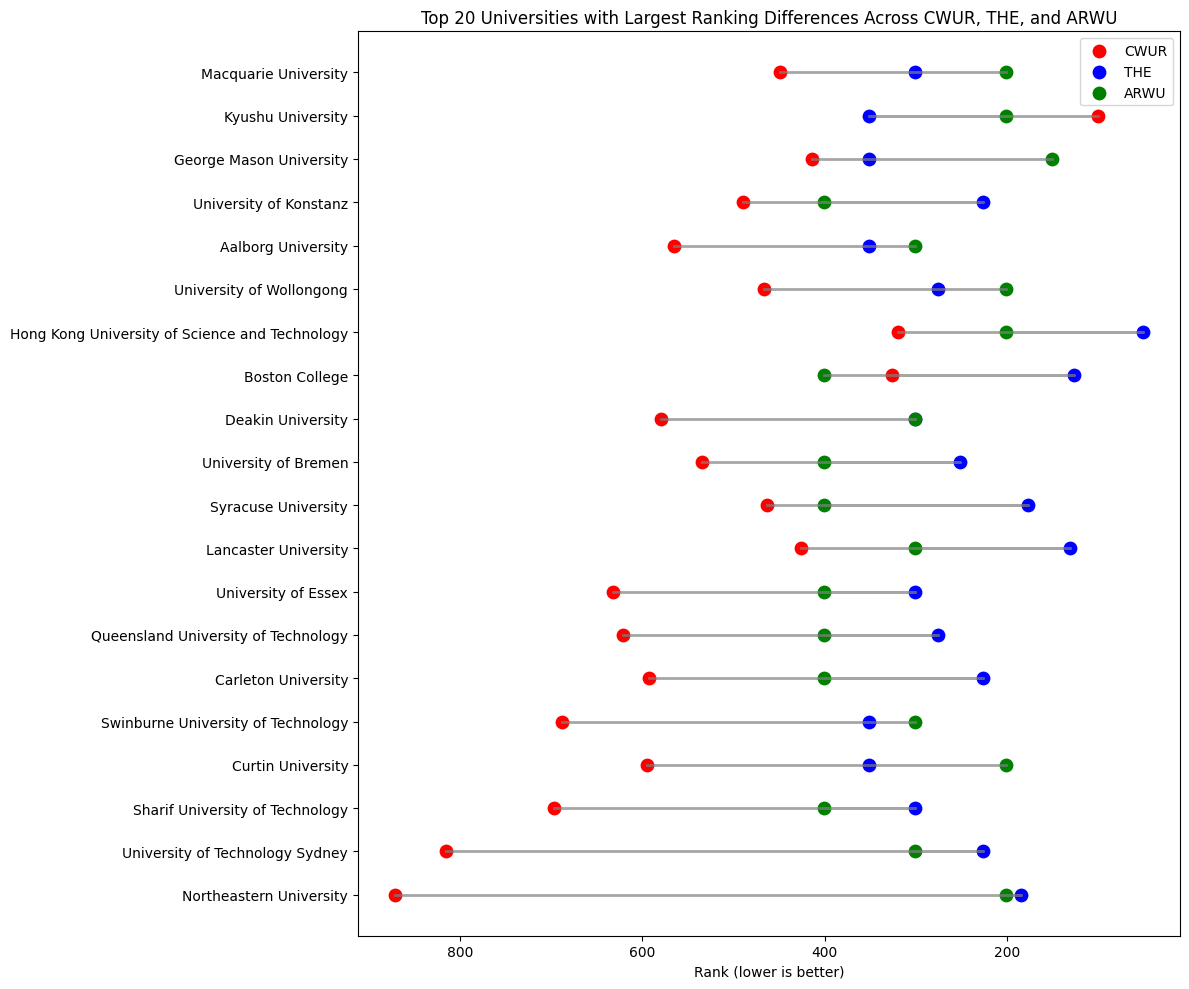

In [ ]:
# Select top 20 universities with biggest ranking gaps
top_gap = df_gap.sort_values("rank_range", ascending=False).head(20)

# Prepare data for plotting
universities = top_gap["institution"]
cwur = top_gap["world_rank_cwur"]
the = top_gap["world_rank_the"]
arwu = top_gap["world_rank_arwu"]

plt.figure(figsize=(12,10))

for i, uni in enumerate(universities):
    # Plot line (gap)
    plt.plot([cwur.iloc[i], the.iloc[i], arwu.iloc[i]],
             [i, i, i],
             color="gray", linewidth=2, alpha=0.7)

    # Plot points
    plt.scatter(cwur.iloc[i], i, color="red", s=80, label="CWUR" if i == 0 else "")
    plt.scatter(the.iloc[i], i, color="blue", s=80, label="THE" if i == 0 else "")
    plt.scatter(arwu.iloc[i], i, color="green", s=80, label="ARWU" if i == 0 else "")

plt.yticks(range(len(universities)), universities)
plt.xlabel("Rank (lower is better)")
plt.title("Top 20 Universities with Largest Ranking Differences Across CWUR, THE, and ARWU")
plt.legend()
plt.gca().invert_xaxis()  # Better appearance: best ranks on left side
plt.tight_layout()
plt.show()


- The large discrepancies between CWUR, THE, and ARWU rankings arise from fundamental differences in evaluation criteria.
- ARWU favors scientific productivity; THE balances research, teaching, and reputation; CWUR emphasizes historical prestige and alumni achievement.

As a result, universities that are research-intensive but lack long historical prestige—such as those in China, Korea, France, and Germany—tend to exhibit the largest cross-ranking gaps.



## Question 4: How does our alma mater perform compared to global universities?

In [ ]:
target = "Wuhan University"

alma_df = merged_df[merged_df["institution"].str.contains(target, case=False)]

alma_df.sort_values("year")

,world_rank_cwur,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,world_rank_the,world_rank_arwu,mean_rank
414,415,Wuhan University,China,19,367,258,218,274,612,645,396.0,576,45.13,2015,351,301,355.666667
676,677,Wuhan University of Technology,China,38,367,499,218,738,931,428,590.0,763,44.39,2015,351,<NA>,514.0


In [ ]:
keyword = "Wuhan University"

the_wuhan = the_df[the_df["institution"]==keyword]
arwu_wuhan = arwu_df[arwu_df["institution"]==keyword]
cwur_wuhan = cwur_df[cwur_df["institution"]==keyword]


In [ ]:
the_wuhan = the_wuhan.rename(columns={"world_rank_the": "rank_the"})
arwu_wuhan = arwu_wuhan.rename(columns={"world_rank_arwu": "rank_arwu"})
cwur_wuhan = cwur_wuhan.rename(columns={"world_rank": "rank_cwur"})


In [ ]:
wuhan_merge = (
    cwur_wuhan[["institution", "year", "rank_cwur"]]
    .merge(the_wuhan[["institution", "year", "rank_the"]], on=["institution", "year"], how="outer")
    .merge(arwu_wuhan[["institution", "year", "rank_arwu"]], on=["institution", "year"], how="outer")
    .sort_values("year")
)

wuhan_merge


,institution,year,rank_cwur,rank_the,rank_arwu
0,Wuhan University,2010,NaN,<NA>,401
1,Wuhan University,2011,NaN,<NA>,401
2,Wuhan University,2012,NaN,350,<NA>
3,Wuhan University,2014,438.0,<NA>,401
4,Wuhan University,2015,415.0,351,301
5,Wuhan University,2016,NaN,401,<NA>


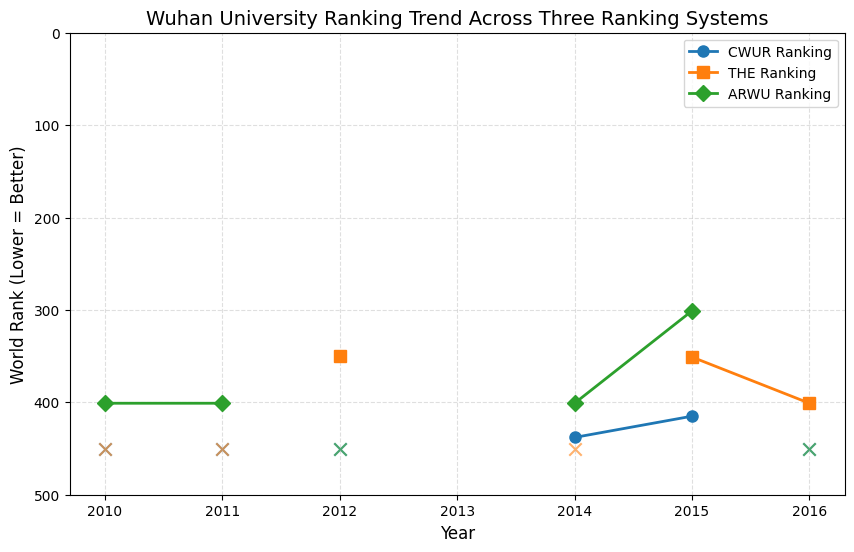

In [ ]:
plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.invert_yaxis()  # rank 1 at top

# === Improved styles ===
plt.plot(
    wuhan_merge["year"], wuhan_merge["rank_cwur"],
    marker='o', markersize=8, linewidth=2,
    color='#1f77b4', label="CWUR Ranking"
)

plt.plot(
    wuhan_merge["year"], wuhan_merge["rank_the"],
    marker='s', markersize=8, linewidth=2,
    color='#ff7f0e', label="THE Ranking"
)

plt.plot(
    wuhan_merge["year"], wuhan_merge["rank_arwu"],
    marker='D', markersize=8, linewidth=2,
    color='#2ca02c', label="ARWU Ranking"
)

# Highlight missing years visually
for col, color in zip(["rank_cwur","rank_the","rank_arwu"],
                      ["#1f77b4","#ff7f0e","#2ca02c"]):
    missing = wuhan_merge[wuhan_merge[col].isna()]
    plt.scatter(missing["year"], [450]*len(missing),
                marker='x', color=color, s=80, alpha=0.6)

plt.xlabel("Year", fontsize=12)
plt.ylabel("World Rank (Lower = Better)", fontsize=12)
plt.title("Wuhan University Ranking Trend Across Three Ranking Systems", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.ylim(500, 0)   # keep range consistent for beauty
plt.show()


Wuhan University shows stable improvement across the years 2010–2015.  
Although it does not enter the global top 50, its trend indicates rising international reputation
and research output.

## Question 5: How does the distribution of universities across countries change from the Top 100 to the Top 500?

In [ ]:
# Top 100 by mean_rank
top100 = merged_df.sort_values("mean_rank").head(100)
top100_counts = (
    top100.groupby("country")["institution"].nunique().sort_values(ascending=False)
)

# Top 500 by mean_rank
top500 = merged_df.sort_values("mean_rank").head(500)
top500_counts = (
    top500.groupby("country")["institution"].nunique().sort_values(ascending=False)
)

print("Top 100 Countries:")
print(top100_counts)

print("\nTop 500 Countries:")
print(top500_counts)



Top 100 Countries:
country
USA               54
United Kingdom     8
Netherlands        5
Australia          4
France             4
Switzerland        4
Canada             3
Germany            3
Japan              3
Belgium            2
Sweden             2
China              2
Israel             2
Finland            1
Denmark            1
South Korea        1
Singapore          1
Name: institution, dtype: int64

Top 500 Countries:
country
USA               153
United Kingdom     39
Germany            38
China              29
Italy              24
Canada             21
Japan              19
France             18
Australia          16
South Korea        16
Spain              15
Netherlands        12
Sweden             10
Switzerland         8
Belgium             7
Finland             6
Austria             5
Israel              5
Denmark             5
Hong Kong           5
South Africa        4
New Zealand         4
India               4
Taiwan              4
Ireland             4
Russia

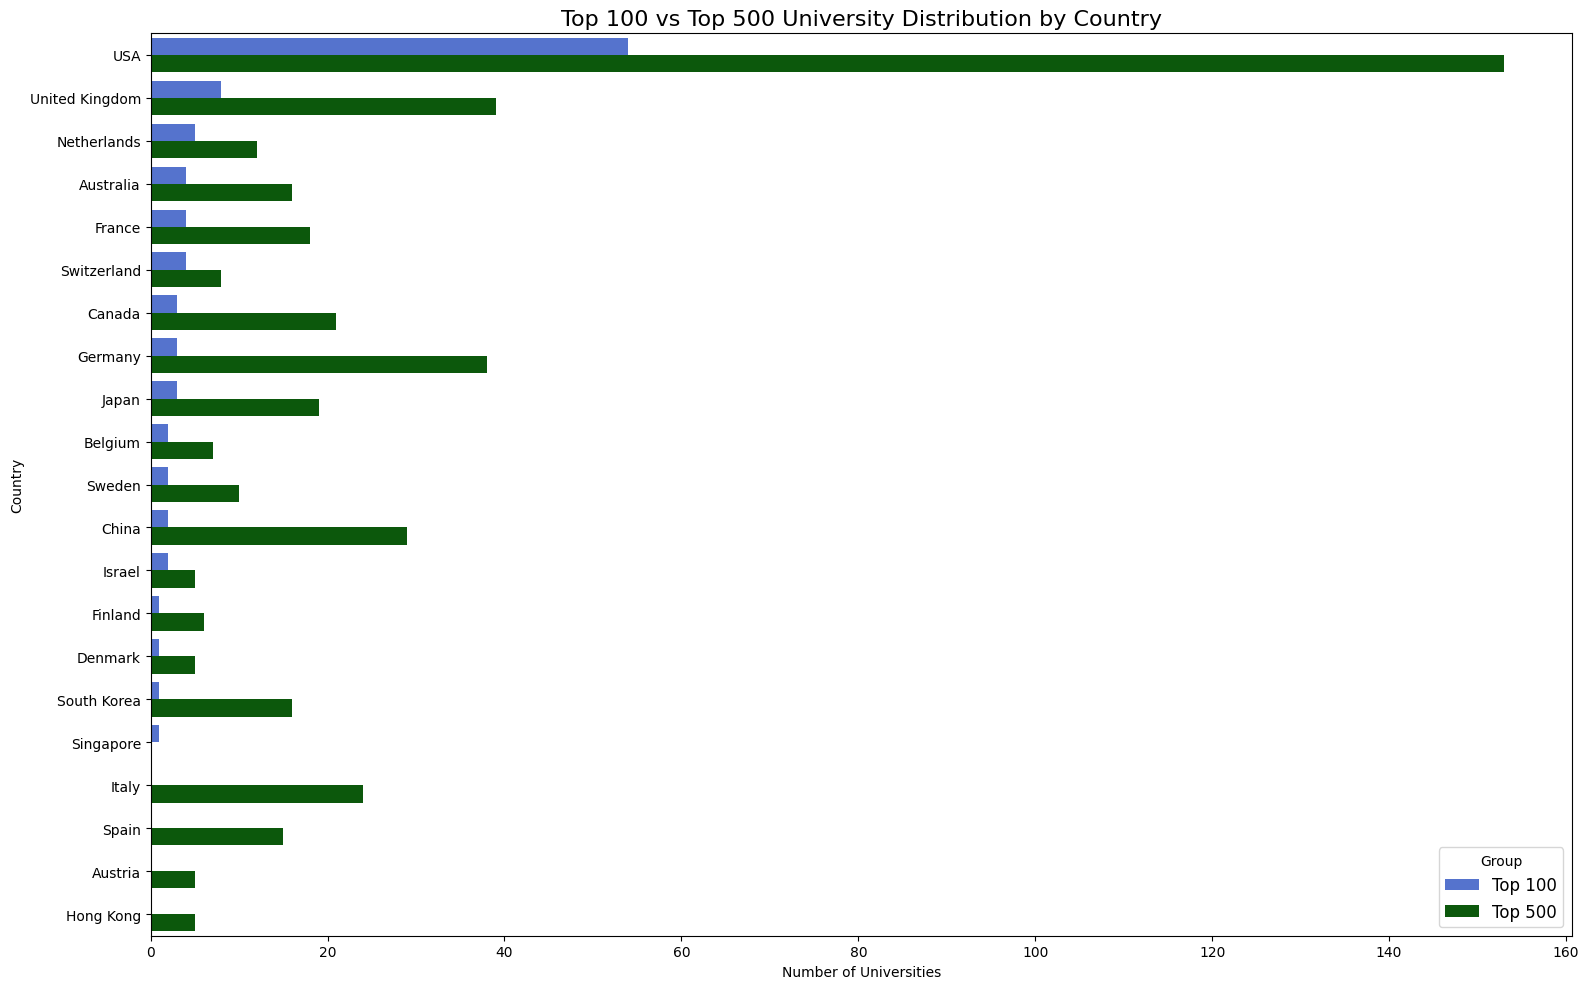

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute Top 100 and Top 500 country counts
top100 = merged_df.sort_values("mean_rank").head(100)
top500 = merged_df.sort_values("mean_rank").head(500)

top100_counts = (
    top100.groupby("country")["institution"].nunique().sort_values(ascending=False)
)

top500_counts = (
    top500.groupby("country")["institution"].nunique().sort_values(ascending=False)
)

# Only show the top 20 countries for clearer visualization
top100_counts = top100_counts.head(20)
top500_counts = top500_counts.head(20)

# Step 2: Convert to DataFrame for seaborn
df100 = top100_counts.reset_index()
df100.columns = ["country", "count"]
df100["group"] = "Top 100"

df500 = top500_counts.reset_index()
df500.columns = ["country", "count"]
df500["group"] = "Top 500"

df_combined = pd.concat([df100, df500], ignore_index=True)

# Step 3: Side-by-side seaborn barplot
plt.figure(figsize=(16, 10))
sns.barplot(
    data=df_combined,
    x="count",
    y="country",
    hue="group",
    palette=["royalblue", "darkgreen"]
)

plt.title("Top 100 vs Top 500 University Distribution by Country", fontsize=16)
plt.xlabel("Number of Universities")
plt.ylabel("Country")
plt.legend(title="Group", fontsize=12)
plt.tight_layout()
plt.show()







The seaborn comparison chart shows that top universities (Top 100) are highly concentrated in a small number of countries, mainly the United States, the United Kingdom, Germany, and Switzerland.

Once the ranking expands to the Top 500, many more countries appear, including China, Japan, France, South Korea, Australia, and the Netherlands.

This pattern indicates a strong concentration at the very top level but much more global diversity outside the top tier.

# Step 5: Summary & conclusion


This project analyzes three major global university ranking systems—THE, ARWU, and CWUR—focusing on their methodologies, data structures, and ranking outcomes. After extensive cleaning, normalization, and rank parsing, a unified 2015 dataset was constructed to enable fair cross-system comparison.

The analysis shows significant differences in data coverage and ranking formats. ARWU and THE rely heavily on rank ranges, while CWUR provides fully continuous ranks. Year coverage also varies, with incomplete ARWU data in 2012–2013, reinforcing the need for careful preprocessing.

Across all systems, top universities remain highly concentrated in a few countries, especially the United States and the United Kingdom. When expanding from the Top 100 to the Top 500, representation becomes more **globally diverse**, with growing presence from China, Japan, France, and South Korea.

Coverage comparison reveals that THE excludes far more universities (153) than ARWU, largely due to **its strict requirement for institutional data submission**. CWUR has the broadest inclusion, as all universities appearing in both THE and ARWU are already present in CWUR.

Ranking consistency analysis shows notable discrepancies for certain universities, especially research-intensive institutions without strong historical prestige, highlighting the methodological differences between systems. Finally, examining Wuhan University demonstrates a positive upward trend across rankings, reflecting its growing international research reputation.
